## Customer Churn Analysis

#### Life cucle of this Machine Learning Model Project

- Understanding the Problem Statement

- Data Collection

- Data Checks to perform

- Data Pre-Processing

- Exploratory Data Analysis

- Model Training

- Choose Best Model

- Hyperparameter Tuning

#### 1) Problem Statement

Identify why customers leave a telecom service and determine patterns from past behavior to prevent churn in the future.


#### 2) Data Collection

- Data Source - https://www.kaggle.com/datasets/shilongzhuang/telecom-customer-churn-by-maven-analytics?select=telecom_customer_churn.csv
- Data consists of 7043 rows and 38 columns.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [106]:
!pip install plotly

import plotly.express as px

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', None)

In [9]:
df = pd.read_csv("E:/VS_Code/Projects/Customer_Churn/notebooks/data/telecom_customer_churn.csv")

df.sample(6)

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
9,0016-QLJIS,Female,43,Yes,1,Sheridan,95681,38.984756,-121.345074,3,65,NaN,Yes,28.46,Yes,Yes,Cable,14.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Two Year,Yes,Credit Card,90.45,5957.90,0.00,0,1849.90,7807.80,Stayed,NaN,NaN
487,0709-TVGUR,Female,70,No,0,Stockton,95207,38.002125,-121.324979,0,9,NaN,Yes,17.56,Yes,Yes,Fiber Optic,27.0,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,74.55,622.90,33.25,0,158.04,747.69,Churned,Competitor,Competitor had better devices
5122,7206-PQBBZ,Male,76,Yes,0,Fontana,92336,34.136367,-117.460803,7,11,Offer D,Yes,24.42,No,Yes,Fiber Optic,29.0,No,No,No,No,No,No,No,Yes,Two Year,Yes,Bank Withdrawal,70.20,834.70,0.00,0,268.62,1103.32,Stayed,NaN,NaN
3065,4389-UEFCZ,Female,25,Yes,0,Monte Rio,95462,38.471049,-123.015549,0,72,NaN,Yes,21.96,Yes,Yes,Fiber Optic,59.0,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Two Year,Yes,Bank Withdrawal,105.50,7544.00,0.00,0,1581.12,9125.12,Stayed,NaN,NaN
1095,1596-BBVTG,Male,53,No,0,San Dimas,91773,34.102119,-117.815532,0,35,Offer C,Yes,25.04,Yes,Yes,Fiber Optic,21.0,No,No,No,No,No,No,No,Yes,Month-to-Month,No,Credit Card,75.35,2636.05,0.00,0,876.40,3512.45,Churned,Dissatisfaction,Poor expertise of online support
2104,3018-TFTSU,Male,44,No,0,Hathaway Pines,95233,38.184914,-120.364085,0,12,Offer D,Yes,18.38,No,Yes,Fiber Optic,3.0,Yes,No,Yes,No,No,No,No,Yes,Month-to-Month,No,Bank Withdrawal,81.70,858.60,0.00,0,220.56,1079.16,Churned,Dissatisfaction,Poor expertise of phone support


In [10]:
df.shape

(7043, 38)

In [11]:
df.columns = df.columns.str.replace(" ", "_").str.lower()

In [12]:
df.sample(6)

,customer_id,gender,age,married,number_of_dependents,city,zip_code,latitude,longitude,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status,churn_category,churn_reason
298,0440-EKDCF,Male,47,Yes,0,Herlong,96113,40.198234,-120.180890,1,62,Offer B,Yes,33.70,No,Yes,Cable,15.0,No,Yes,Yes,Yes,No,No,No,Yes,Two Year,Yes,Credit Card,60.15,3753.20,0.00,0,2089.40,5842.60,Stayed,NaN,NaN
5409,7621-VPNET,Female,60,Yes,0,Arcadia,91006,34.137319,-118.029837,8,42,NaN,Yes,20.58,Yes,Yes,Fiber Optic,13.0,No,No,Yes,Yes,No,No,No,Yes,Month-to-Month,Yes,Credit Card,85.90,3729.75,0.00,0,864.36,4594.11,Stayed,NaN,NaN
6845,9722-UJOJR,Male,36,Yes,0,Blairsden Graeagle,96103,39.783747,-120.661032,1,29,NaN,Yes,11.24,No,Yes,Fiber Optic,16.0,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,70.75,1974.80,0.00,0,325.96,2300.76,Churned,Price,Price too high
1576,2294-SALNE,Male,51,Yes,0,Chula Vista,91910,32.636792,-117.054989,2,23,Offer D,Yes,16.63,No,Yes,Fiber Optic,22.0,No,Yes,Yes,Yes,No,No,No,No,One Year,No,Credit Card,86.80,1940.80,0.00,90,382.49,2413.29,Stayed,NaN,NaN
6855,9739-JLPQJ,Female,58,Yes,1,Long Beach,90822,33.778436,-118.118648,9,72,NaN,Yes,33.37,Yes,Yes,Fiber Optic,16.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Two Year,No,Credit Card,117.50,8670.10,47.55,0,2402.64,11025.19,Stayed,NaN,NaN
4801,6746-WAUWT,Male,62,No,0,Salida,95368,37.713152,-121.087390,0,19,NaN,Yes,26.54,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,One Year,Yes,Credit Card,19.70,386.50,0.00,0,504.26,890.76,Stayed,NaN,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   customer_id                        7043 non-null   object 
 1   gender                             7043 non-null   object 
 2   age                                7043 non-null   int64  
 3   married                            7043 non-null   object 
 4   number_of_dependents               7043 non-null   int64  
 5   city                               7043 non-null   object 
 6   zip_code                           7043 non-null   int64  
 7   latitude                           7043 non-null   float64
 8   longitude                          7043 non-null   float64
 9   number_of_referrals                7043 non-null   int64  
 10  tenure_in_months                   7043 non-null   int64  
 11  offer                              3166 non-null   objec

In [14]:
df.describe()

,age,number_of_dependents,zip_code,latitude,longitude,number_of_referrals,tenure_in_months,avg_monthly_long_distance_charges,avg_monthly_gb_download,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,14.200374,19.586585,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,13.050000,13.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,37.680000,30.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [15]:
df.shape

(7043, 38)

#### Data Checks to perform

- Check Missing values

- Check Duplicates

- Check data type

- Check the number of unique values of each column

- Check statistics of data set

- Check various categories present in the different categorical columns

In [16]:
df.isna().sum()

customer_id                             0
gender                                  0
age                                     0
married                                 0
number_of_dependents                    0
city                                    0
zip_code                                0
latitude                                0
longitude                               0
number_of_referrals                     0
tenure_in_months                        0
offer                                3877
phone_service                           0
avg_monthly_long_distance_charges     682
multiple_lines                        682
internet_service                        0
internet_type                        1526
avg_monthly_gb_download              1526
online_security                      1526
online_backup                        1526
device_protection_plan               1526
premium_tech_support                 1526
streaming_tv                         1526
streaming_movies                  

In [17]:
df.isna().mean() * 100

customer_id                           0.000000
gender                                0.000000
age                                   0.000000
married                               0.000000
number_of_dependents                  0.000000
city                                  0.000000
zip_code                              0.000000
latitude                              0.000000
longitude                             0.000000
number_of_referrals                   0.000000
tenure_in_months                      0.000000
offer                                55.047565
phone_service                         0.000000
avg_monthly_long_distance_charges     9.683374
multiple_lines                        9.683374
internet_service                      0.000000
internet_type                        21.666903
avg_monthly_gb_download              21.666903
online_security                      21.666903
online_backup                        21.666903
device_protection_plan               21.666903
premium_tech_

In [18]:
df['offer'].unique()

array([nan, 'Offer E', 'Offer D', 'Offer A', 'Offer B', 'Offer C'],
      dtype=object)

In [19]:
df['has_offer'] = df['offer'].apply(lambda x: 1 if x is not np.nan else 0)

In [20]:
df['offer'] = df['offer'].fillna('No Offer')

In [21]:
offer_freq = df['offer'].value_counts(normalize = True).to_dict()

df['offer_popularity'] = df['offer'].map(offer_freq)

In [22]:
df['avg_monthly_long_distance_charges'] = df['avg_monthly_long_distance_charges'].fillna(0).astype(int)

In [23]:
df['multiple_lines'].fillna(df['multiple_lines'].mode()[0], inplace = True)

In [24]:
df['multiple_lines'].isna().sum()

np.int64(0)

In [25]:
df['internet_type'].isna().sum()

np.int64(1526)

In [26]:
df['internet_type'].unique()

array(['Cable', 'Fiber Optic', 'DSL', nan], dtype=object)

In [27]:
df[df['internet_type'].isna()]['internet_service'].value_counts()

internet_service
No    1526
Name: count, dtype: int64

In [28]:
df['internet_type'] = df['internet_type'].fillna('No Internet')

In [29]:
df['avg_monthly_gb_download'].describe()

count    5517.000000
mean       26.189958
std        19.586585
min         2.000000
25%        13.000000
50%        21.000000
75%        30.000000
max        85.000000
Name: avg_monthly_gb_download, dtype: float64

In [30]:
df['avg_monthly_gb_download'].unique()

array([16., 10., 30.,  4., 11., 73., 14.,  7., 21., 59., 19., 12., 20.,
       22., 17.,  9., nan, 52., 57., 51., 41., 23., 27.,  2., 69., 53.,
       15., 29., 85., 28., 18., 48., 25., 26.,  8.,  6.,  5., 13., 75.,
       82., 24., 76., 47., 71., 58., 42.,  3., 56., 46., 39.])

In [31]:
df['avg_monthly_gb_download'].isna().sum()

np.int64(1526)

In [32]:
df[df['internet_service'] == 'No'][['avg_monthly_gb_download', 'internet_service']].shape[0]

1526

In [33]:
df.loc[df['internet_service'] == 'No', 'avg_monthly_gb_download'] = 0

In [34]:
df['avg_monthly_gb_download'].isna().sum()

np.int64(0)

In [35]:
df['avg_monthly_gb_download'].unique()

array([16., 10., 30.,  4., 11., 73., 14.,  7., 21., 59., 19., 12., 20.,
       22., 17.,  9.,  0., 52., 57., 51., 41., 23., 27.,  2., 69., 53.,
       15., 29., 85., 28., 18., 48., 25., 26.,  8.,  6.,  5., 13., 75.,
       82., 24., 76., 47., 71., 58., 42.,  3., 56., 46., 39.])

In [36]:
df['online_security'].unique()

array(['No', 'Yes', nan], dtype=object)

In [37]:
df[df['online_security'].isna()]['internet_service'].value_counts()

internet_service
No    1526
Name: count, dtype: int64

In [38]:
df.loc[df['internet_service'] == 'No']['online_security'].shape

(1526,)

In [39]:
df.loc[df['internet_service'] == 'No', 'online_security'] = 'No'

In [40]:
df['online_security'].unique()

array(['No', 'Yes'], dtype=object)

In [41]:
df.sample(6)

,customer_id,gender,age,married,number_of_dependents,city,zip_code,latitude,longitude,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status,churn_category,churn_reason,has_offer,offer_popularity
4556,6421-SZVEM,Female,30,Yes,1,Carson,90745,33.822295,-118.264110,4,28,Offer C,Yes,16,No,Yes,Fiber Optic,69.0,Yes,No,No,No,No,Yes,Yes,Yes,One Year,Yes,Bank Withdrawal,82.85,2320.80,0.00,0,451.64,2772.44,Stayed,NaN,NaN,1,0.058924
1682,2452-SNHFZ,Female,19,No,0,Elk Creek,95939,39.532220,-122.594879,0,47,No Offer,Yes,48,No,Yes,Fiber Optic,69.0,Yes,No,No,No,No,No,No,Yes,Month-to-Month,No,Credit Card,75.45,3545.10,0.00,0,2257.41,5802.51,Stayed,NaN,NaN,0,0.550476
791,1154-HYWWO,Male,55,No,0,San Clemente,92672,33.429488,-117.609432,0,38,Offer C,Yes,42,No,Yes,DSL,22.0,Yes,Yes,No,Yes,Yes,No,No,Yes,One Year,No,Credit Card,70.60,2708.20,0.00,0,1605.12,4313.32,Stayed,NaN,NaN,1,0.058924
5324,7520-HQWJU,Female,22,Yes,1,Santa Ysabel,92070,33.174725,-116.743329,6,66,No Offer,Yes,23,Yes,Yes,DSL,59.0,Yes,Yes,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,67.45,4508.65,41.67,0,1531.20,5998.18,Stayed,NaN,NaN,0,0.550476
4518,6368-NWMCE,Female,61,No,0,Merced,95340,37.255637,-120.493537,0,38,No Offer,Yes,21,Yes,Yes,DSL,24.0,No,Yes,No,Yes,No,Yes,Yes,Yes,Month-to-Month,No,Credit Card,68.15,2656.30,0.00,0,805.22,3461.52,Stayed,NaN,NaN,0,0.550476
5439,7658-UYUQS,Male,71,Yes,0,Fullerton,92835,33.902211,-117.914922,0,21,No Offer,Yes,22,No,Yes,Fiber Optic,9.0,No,No,Yes,No,Yes,No,No,Yes,Month-to-Month,No,Bank Withdrawal,86.55,1857.25,0.00,0,468.30,2325.55,Stayed,NaN,NaN,0,0.550476


In [42]:
df[df['internet_service'] == 'No'][['online_backup',	'device_protection_plan',	'premium_tech_support',	'streaming_tv',	'streaming_movies',	'streaming_music',	'unlimited_data']].shape

(1526, 7)

In [43]:
df['online_backup'].unique()

array(['Yes', 'No', nan], dtype=object)

In [44]:
df['device_protection_plan'].unique()

array(['No', 'Yes', nan], dtype=object)

In [45]:
df['premium_tech_support'].unique()

array(['Yes', 'No', nan], dtype=object)

In [46]:
df['streaming_tv'].unique()

array(['Yes', 'No', nan], dtype=object)

In [47]:
df['streaming_movies'].unique()

array(['No', 'Yes', nan], dtype=object)

In [48]:
df['streaming_music'].unique()

array(['No', 'Yes', nan], dtype=object)

In [49]:
df['unlimited_data'].unique()

array(['Yes', 'No', nan], dtype=object)

In [50]:
cols = [
    'online_backup',
    'device_protection_plan',
    'premium_tech_support',
    'streaming_tv',
    'streaming_movies',
    'streaming_music',
    'unlimited_data'
]

df.loc[df['internet_service'] == 'No', cols] = 'No'

In [51]:
df.isna().mean() * 100

customer_id                           0.000000
gender                                0.000000
age                                   0.000000
married                               0.000000
number_of_dependents                  0.000000
city                                  0.000000
zip_code                              0.000000
latitude                              0.000000
longitude                             0.000000
number_of_referrals                   0.000000
tenure_in_months                      0.000000
offer                                 0.000000
phone_service                         0.000000
avg_monthly_long_distance_charges     0.000000
multiple_lines                        0.000000
internet_service                      0.000000
internet_type                         0.000000
avg_monthly_gb_download               0.000000
online_security                       0.000000
online_backup                         0.000000
device_protection_plan                0.000000
premium_tech_

In [52]:
temp_df = df.copy()

In [53]:
df.drop(columns = ['churn_category', 'churn_reason'], inplace = True)

In [54]:
df.sample(6)

,customer_id,gender,age,married,number_of_dependents,city,zip_code,latitude,longitude,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status,has_offer,offer_popularity
505,0739-UUAJR,Female,61,Yes,1,Mountain View,94040,37.380662,-122.086022,10,72,Offer A,No,0,No,Yes,Cable,14.0,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Two Year,Yes,Credit Card,53.80,3952.45,0.0,0,0.00,3952.45,Stayed,1,0.073832
6685,9500-LTVBP,Female,63,No,0,Rancho Palos Verdes,90275,33.753146,-118.367459,0,35,Offer C,Yes,13,Yes,Yes,Fiber Optic,6.0,No,No,No,Yes,No,No,No,Yes,Month-to-Month,No,Credit Card,80.05,2835.90,0.0,0,459.90,3295.80,Stayed,1,0.058924
96,0164-XAIRP,Female,51,No,0,La Mirada,90638,33.902045,-118.008961,0,24,No Offer,Yes,10,No,No,No Internet,0.0,No,No,No,No,No,No,No,No,Two Year,Yes,Bank Withdrawal,19.55,470.20,0.0,0,255.36,725.56,Stayed,0,0.550476
795,1162-ECVII,Male,66,Yes,0,Fresno,93704,36.799648,-119.801247,1,72,Offer A,Yes,18,Yes,Yes,Fiber Optic,14.0,No,Yes,Yes,Yes,Yes,Yes,Yes,No,Two Year,Yes,Bank Withdrawal,109.75,7932.50,0.0,140,1349.28,9421.78,Stayed,1,0.073832
816,1194-HVAIF,Female,21,Yes,0,Capistrano Beach,92624,33.458754,-117.665104,1,27,Offer C,Yes,18,Yes,Yes,Fiber Optic,26.0,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,No,Credit Card,95.00,2462.55,0.0,0,497.34,2959.89,Stayed,1,0.058924
3620,5133-VRSAB,Male,47,No,0,Olema,94950,38.052209,-122.775567,0,8,Offer E,No,0,No,Yes,Cable,8.0,Yes,No,No,No,No,No,No,No,Month-to-Month,No,Credit Card,29.35,216.45,0.0,10,0.00,226.45,Stayed,1,0.114298


In [98]:
def tenure_category(months):
    if months <= 12:
        return '0-1 Year'
    elif months <= 24:
        return '1-2 Years'
    elif months <= 48:
        return '2-4 Years'
    else:
        return '4+ Years'

df['tenure_category'] = df['tenure_in_months'].apply(tenure_category)

In [99]:
services = [
    'online_security', 'online_backup', 'device_protection_plan',
    'premium_tech_support', 'streaming_tv', 'streaming_movies',
    'streaming_music', 'multiple_lines', 'internet_service'
]

df['engagement_score'] = df[services].apply(lambda row: sum(row == 'Yes'), axis=1)


In [100]:
df['high_value'] = df['total_revenue'] > df['total_revenue'].quantile(0.75)

In [101]:
addon_cols = ['online_security', 'online_backup', 'device_protection_plan', 'premium_tech_support']
df['num_addon_services'] = df[addon_cols].apply(lambda row: sum(row == 'Yes'), axis=1)

In [102]:
df.head()

,customer_id,gender,age,married,number_of_dependents,city,zip_code,latitude,longitude,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status,has_offer,offer_popularity,has_extra_internet_charges,tenure_category,engagement_score,high_value,num_addon_services
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,No Offer,Yes,42,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,0,0.550476,0,0-1 Year,4,False,2
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,No Offer,Yes,10,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,0,0.550476,1,0-1 Year,4,False,0
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,Offer E,Yes,33,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,1,0.114298,0,0-1 Year,2,False,1
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,Offer D,Yes,27,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,1,0.085475,0,1-2 Years,5,False,2
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,No Offer,Yes,7,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,0,0.550476,0,0-1 Year,3,False,1


## EDA

#### **Univariate Analysis**

In [55]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Numerical columns:", num_cols)

Numerical columns: ['age', 'number_of_dependents', 'zip_code', 'latitude', 'longitude', 'number_of_referrals', 'tenure_in_months', 'avg_monthly_long_distance_charges', 'avg_monthly_gb_download', 'monthly_charge', 'total_charges', 'total_refunds', 'total_extra_data_charges', 'total_long_distance_charges', 'total_revenue', 'has_offer', 'offer_popularity']


In [56]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

cat_cols = cat_cols[1:]

print("Categorical columns:", cat_cols)

Categorical columns: ['gender', 'married', 'city', 'offer', 'phone_service', 'multiple_lines', 'internet_service', 'internet_type', 'online_security', 'online_backup', 'device_protection_plan', 'premium_tech_support', 'streaming_tv', 'streaming_movies', 'streaming_music', 'unlimited_data', 'contract', 'paperless_billing', 'payment_method', 'customer_status']


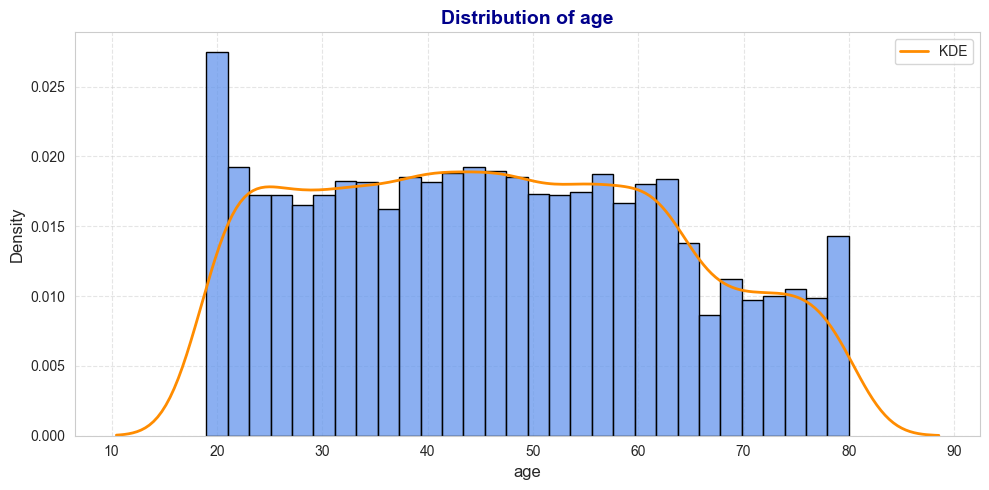

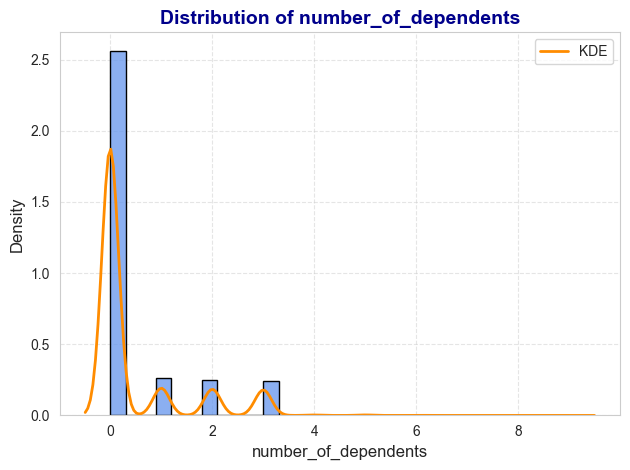

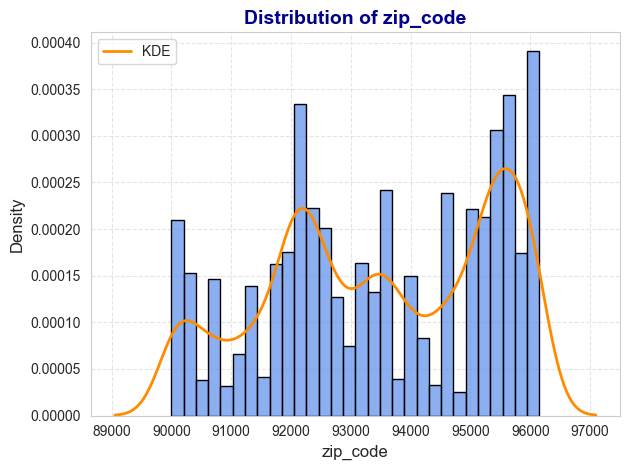

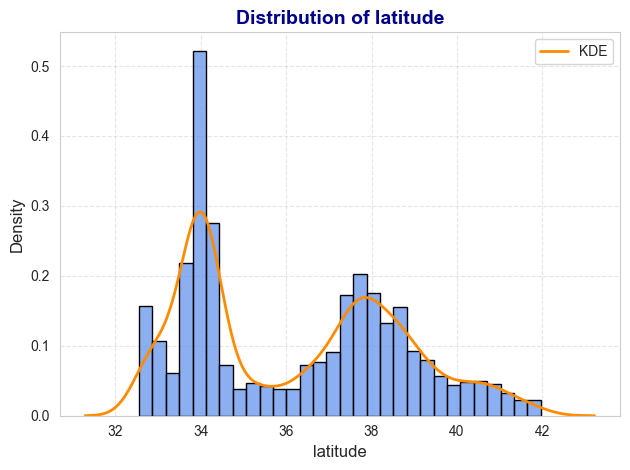

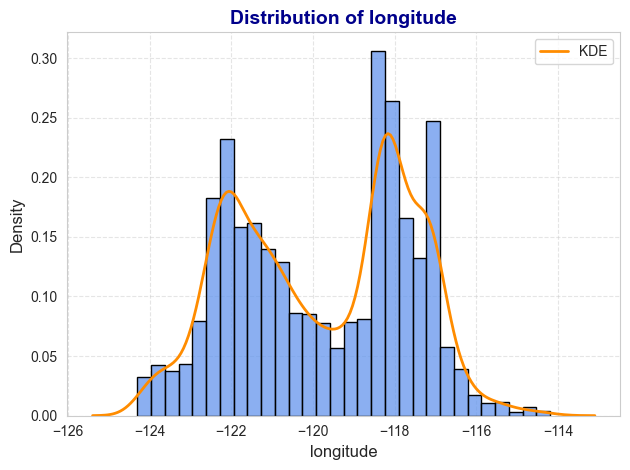

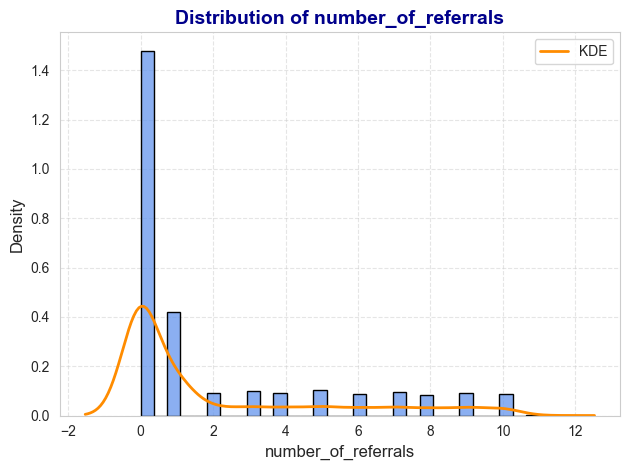

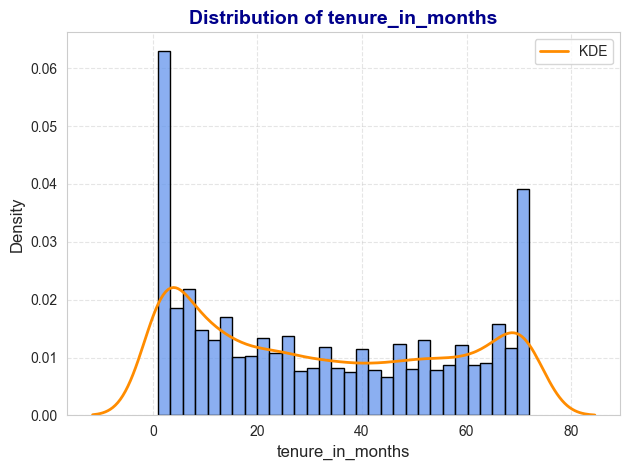

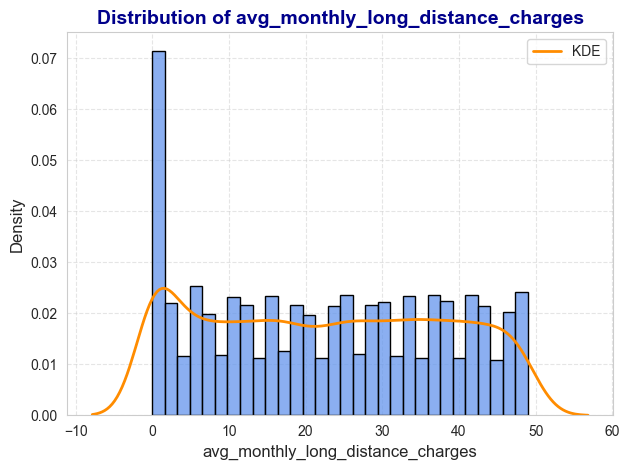

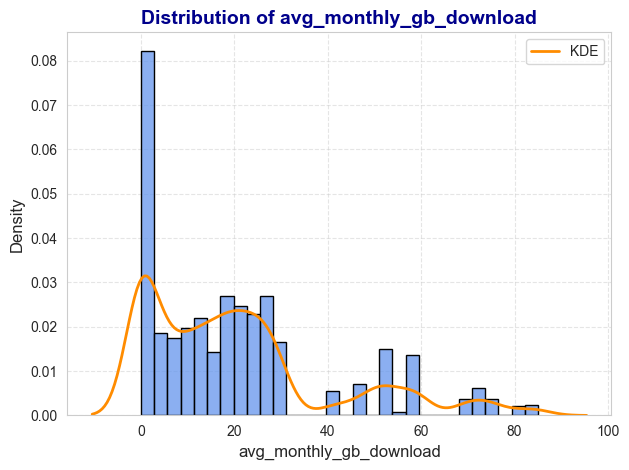

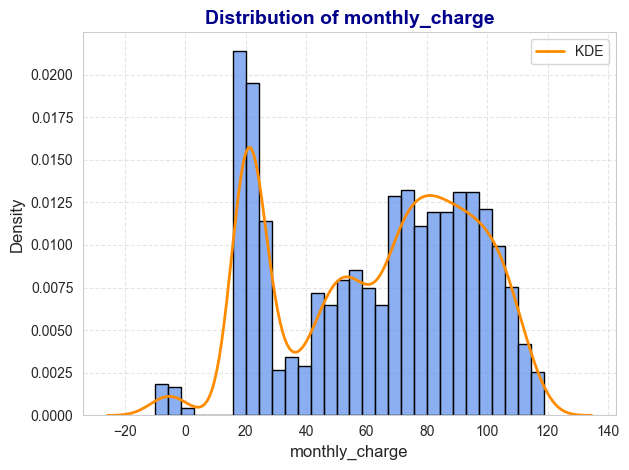

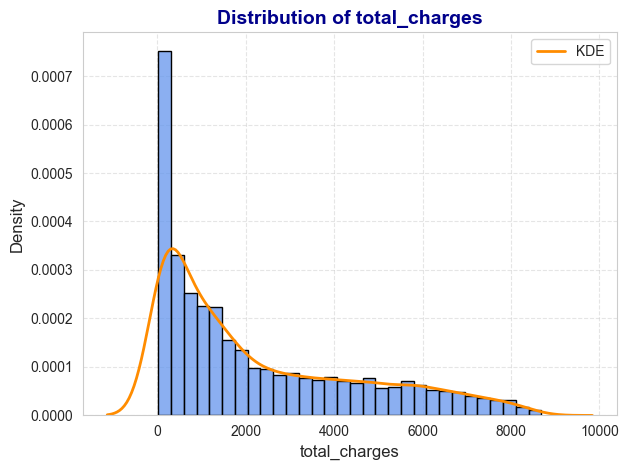

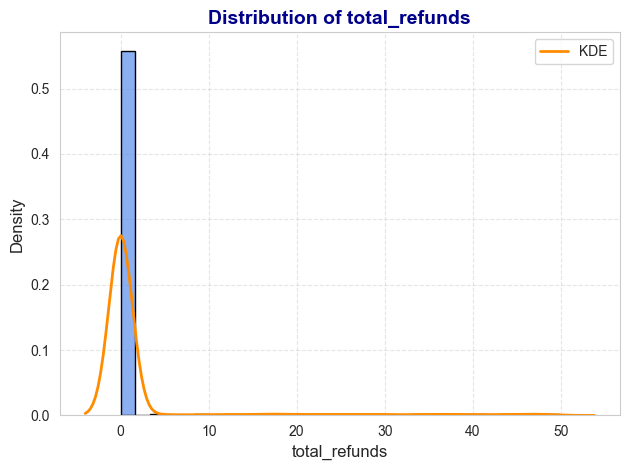

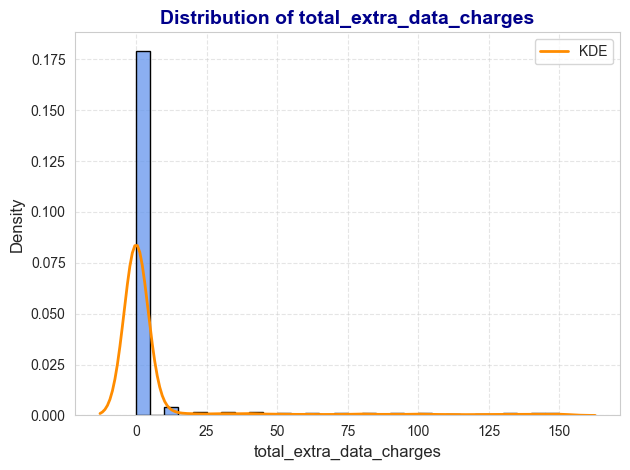

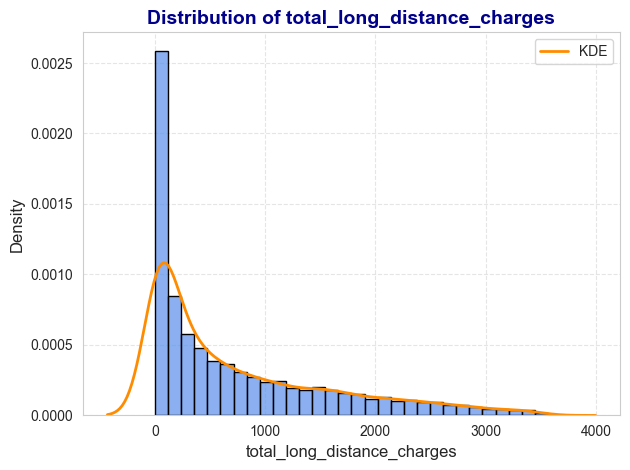

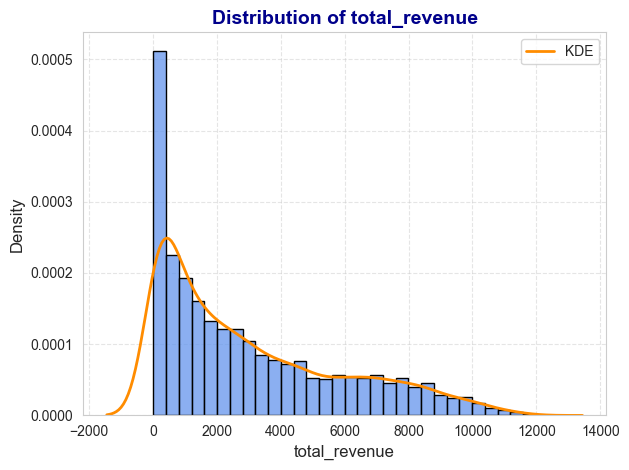

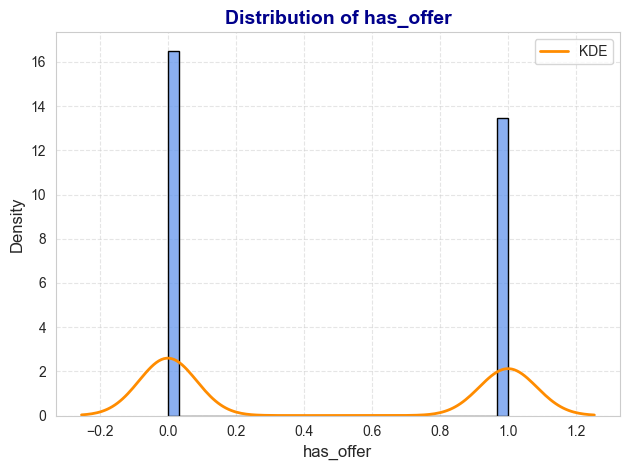

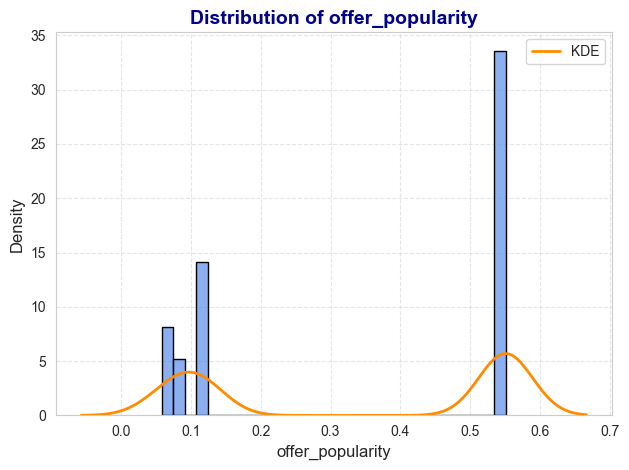

In [57]:
sns.set_style("whitegrid")
sns.set_palette("Set2")
plt.figure(figsize=(10, 5))


for col in num_cols:

    sns.histplot(data=df, x=col, bins=30, color='cornflowerblue', edgecolor='black', stat='density')

    sns.kdeplot(data=df, x=col, color='darkorange', linewidth=2, label='KDE')

    plt.title(f'Distribution of {col}', fontsize=14, fontweight='bold', color='darkblue')
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Density', fontsize=12)

    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()

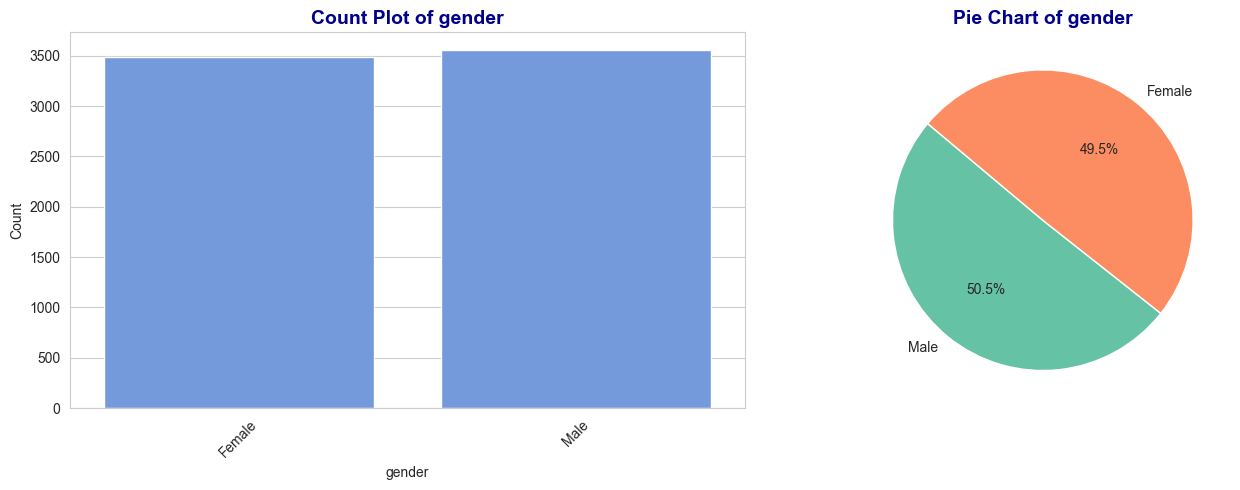

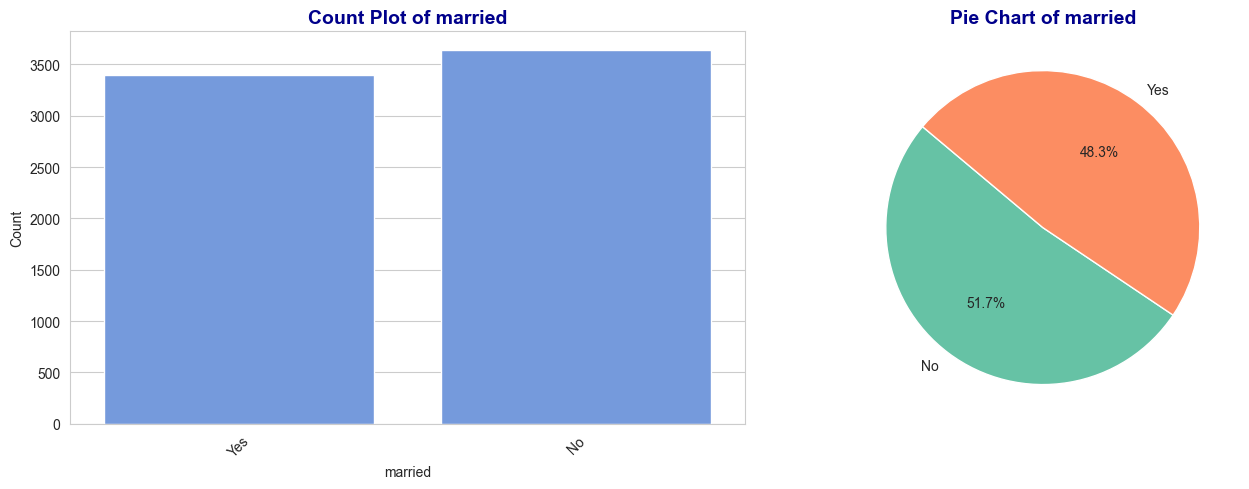

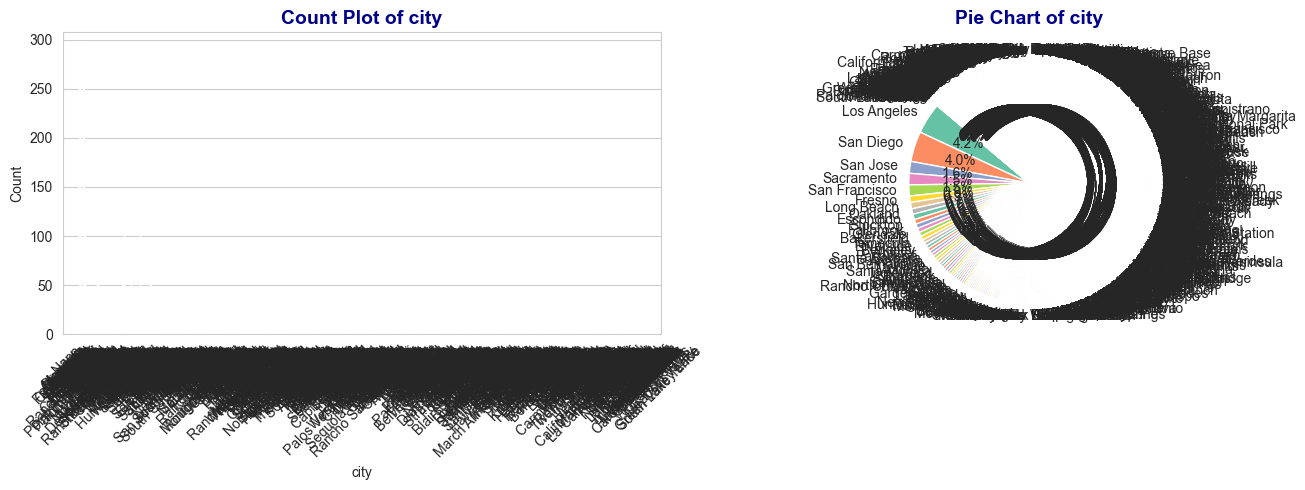

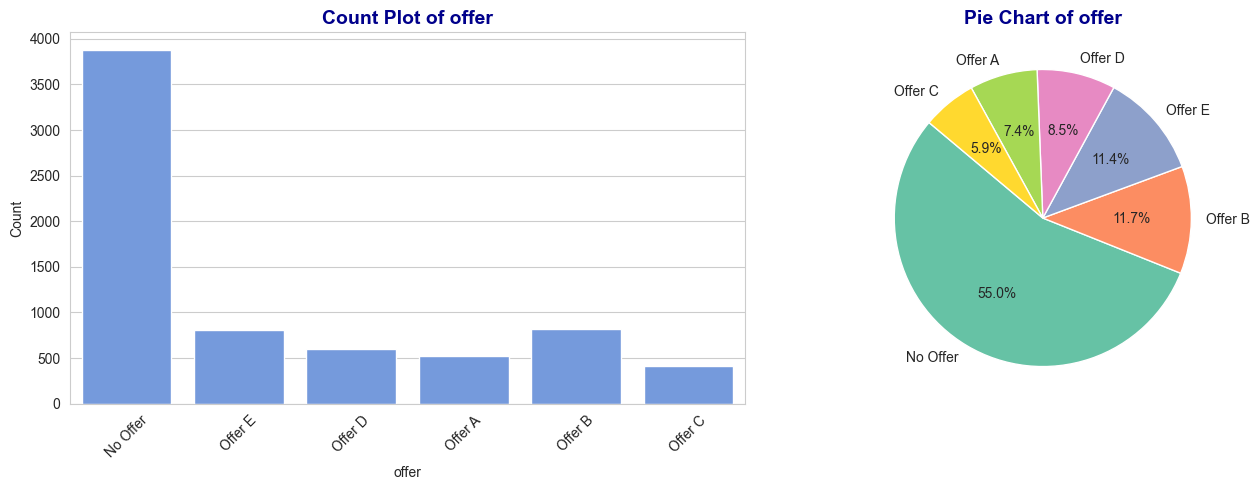

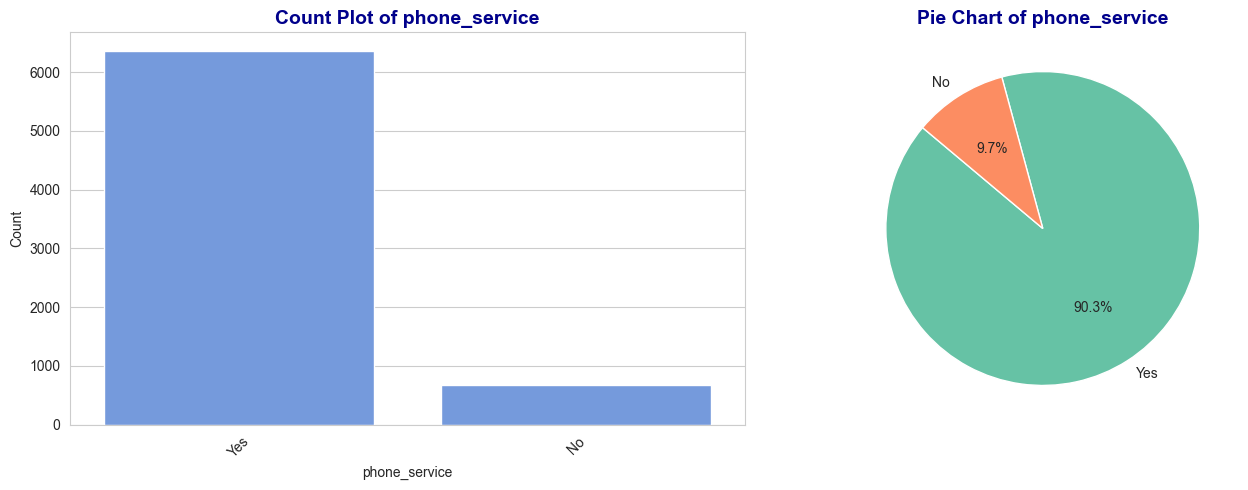

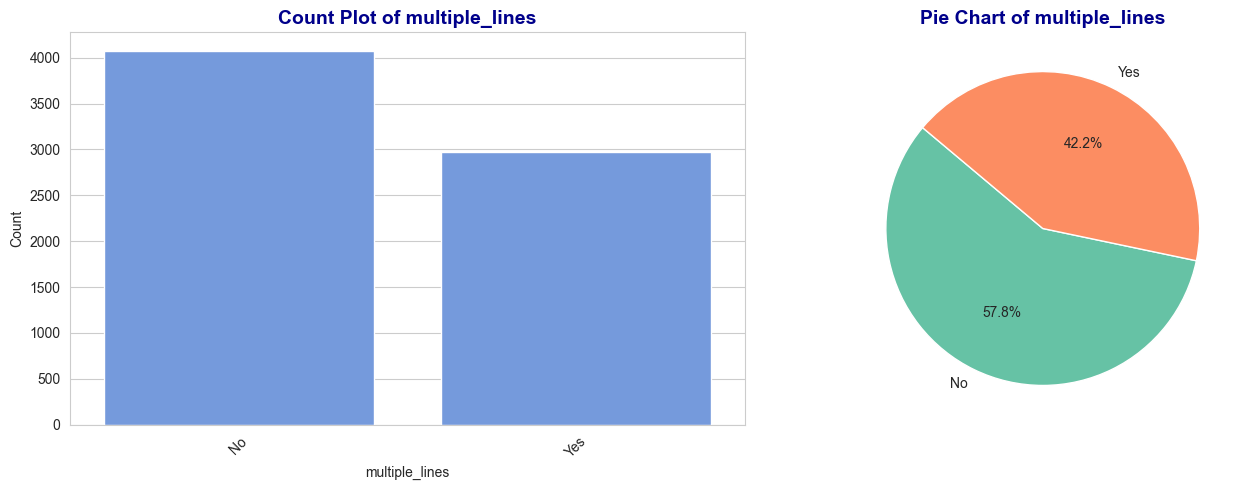

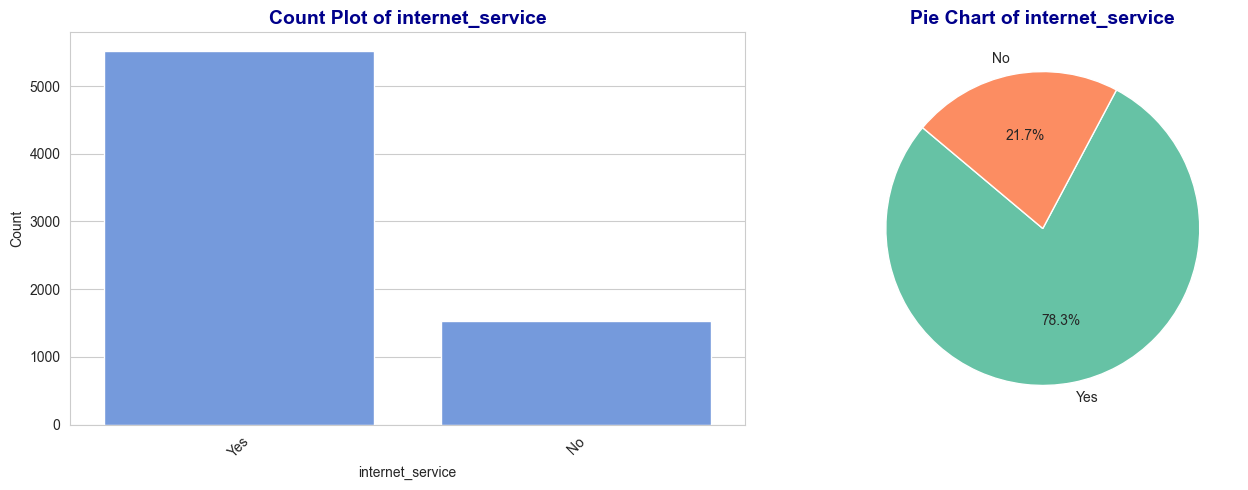

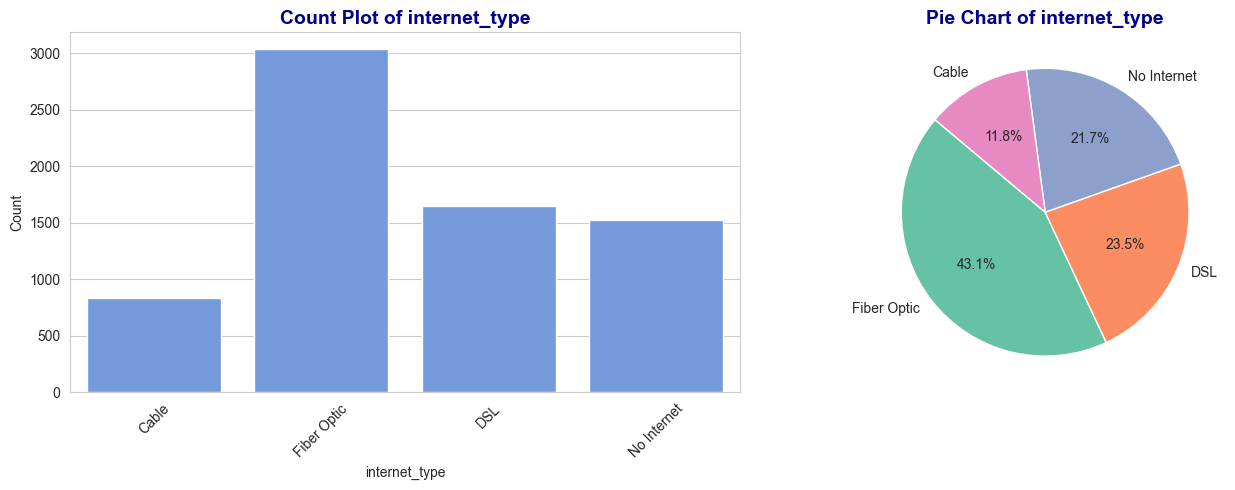

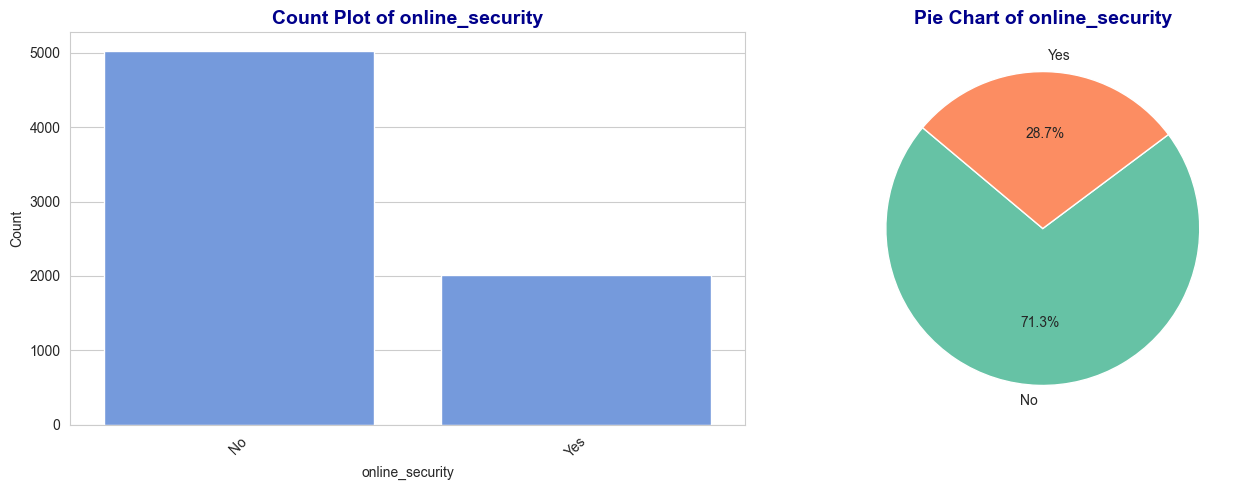

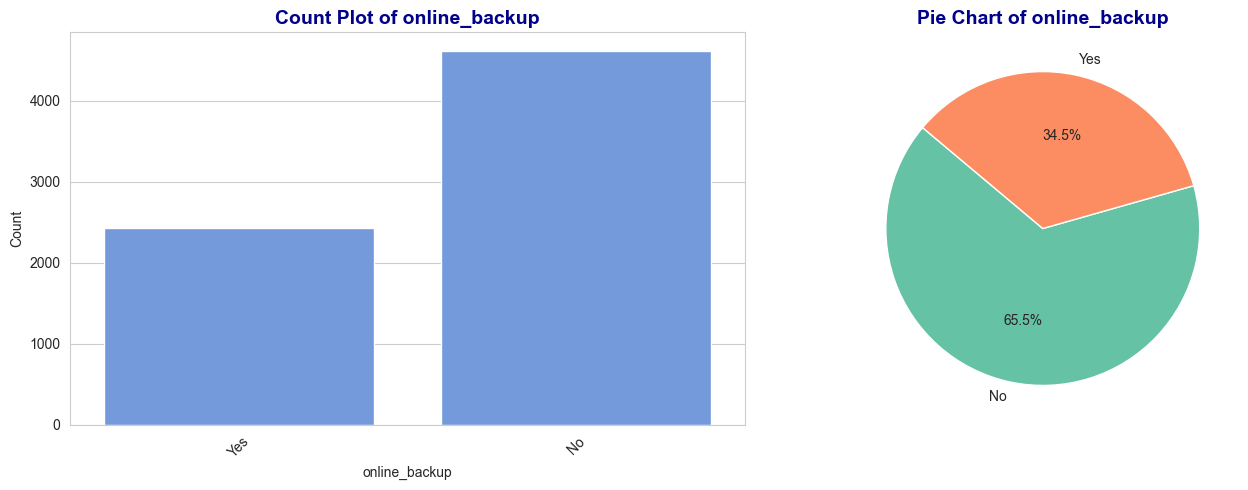

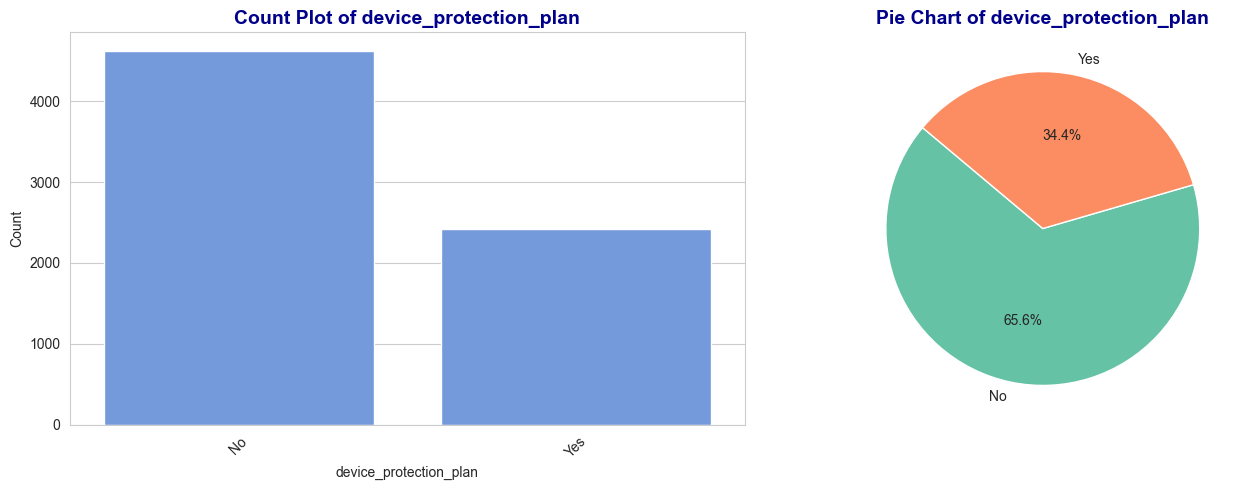

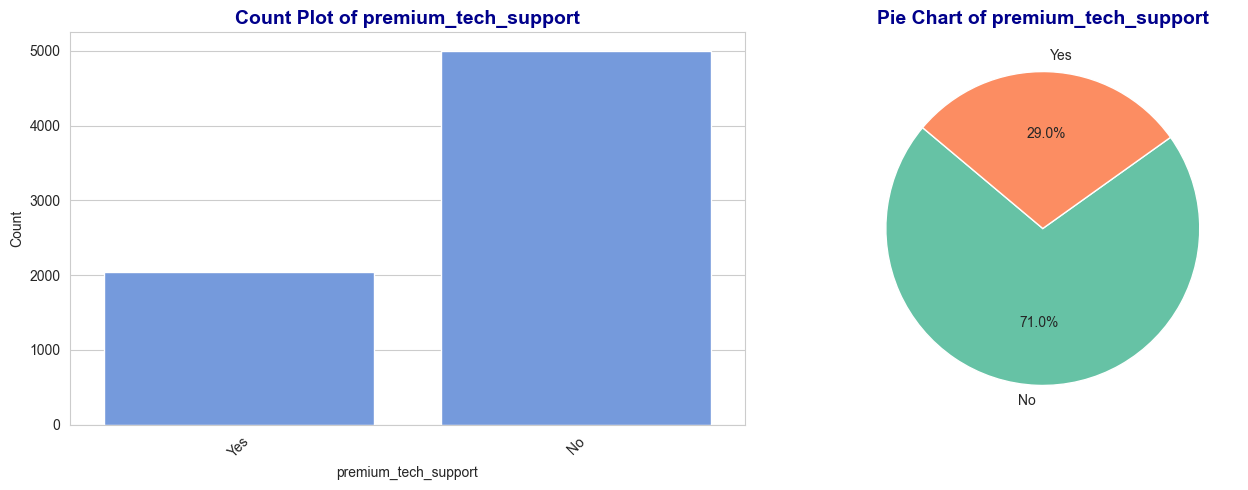

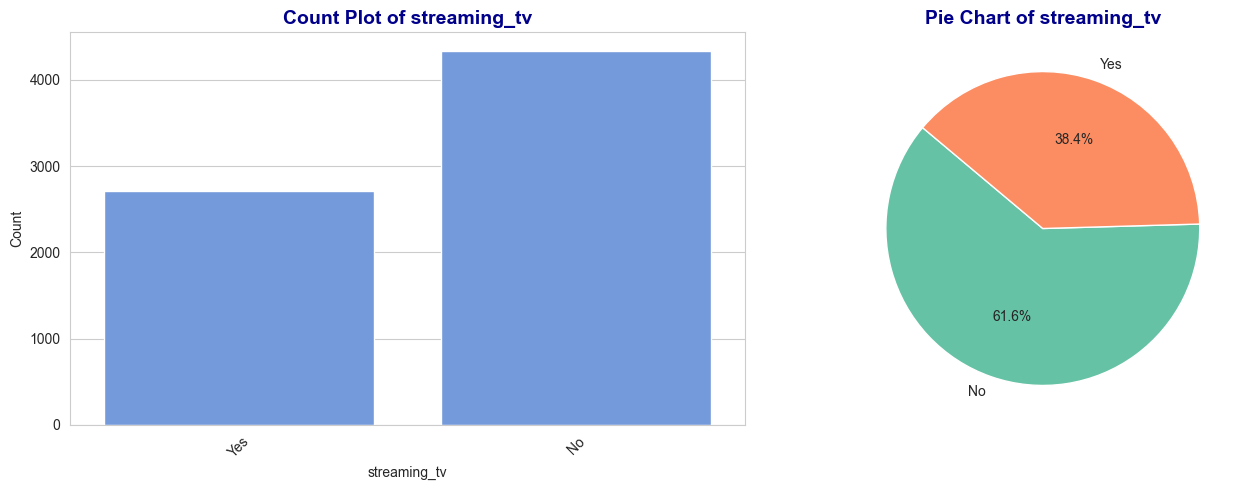

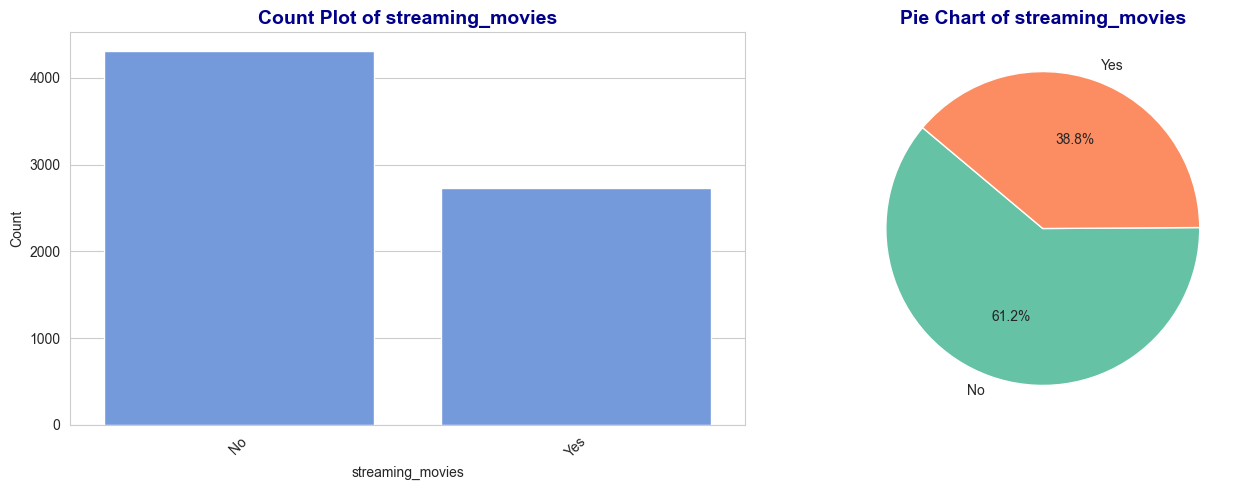

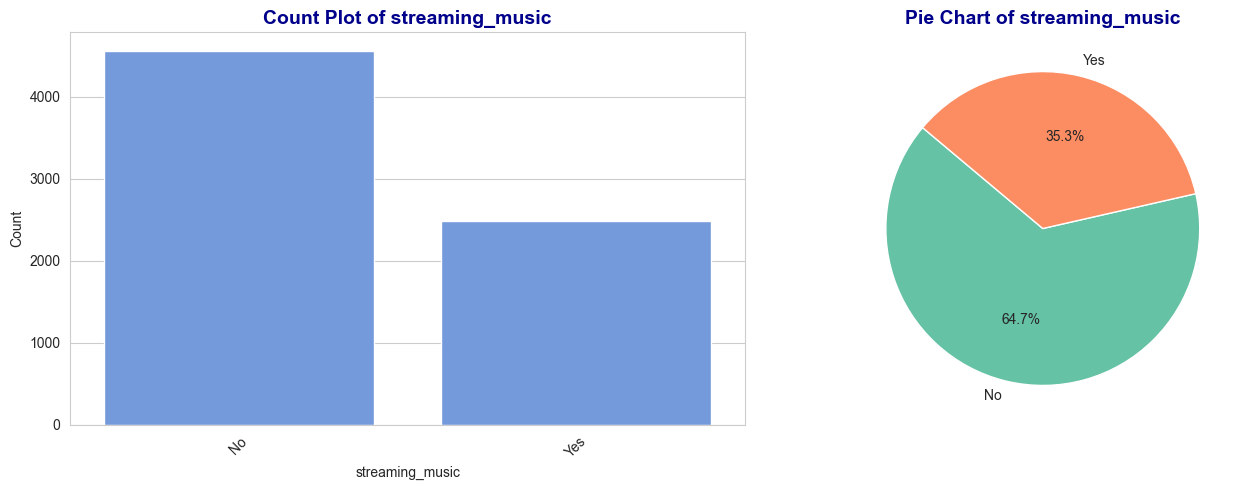

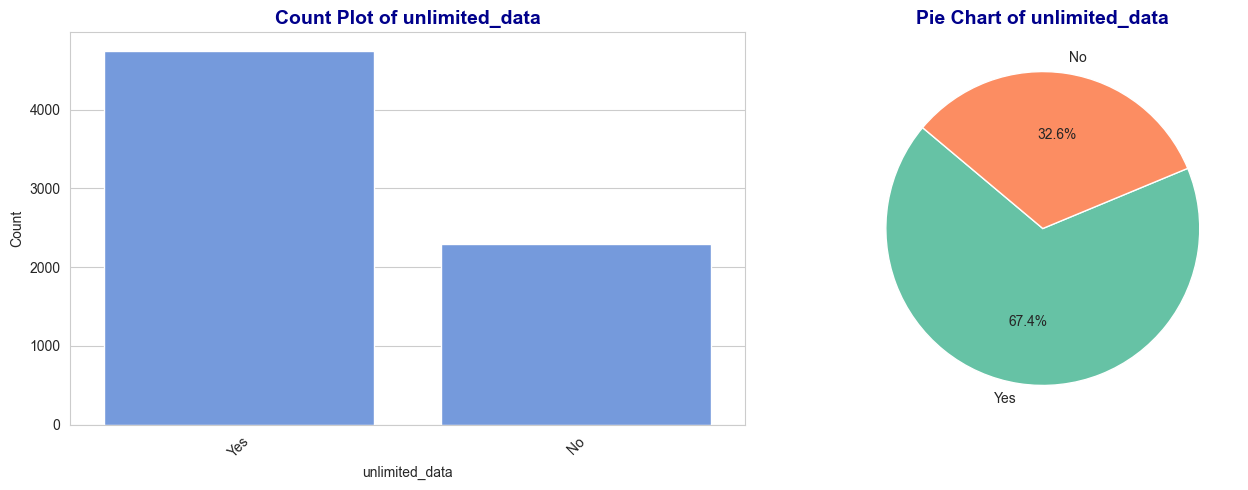

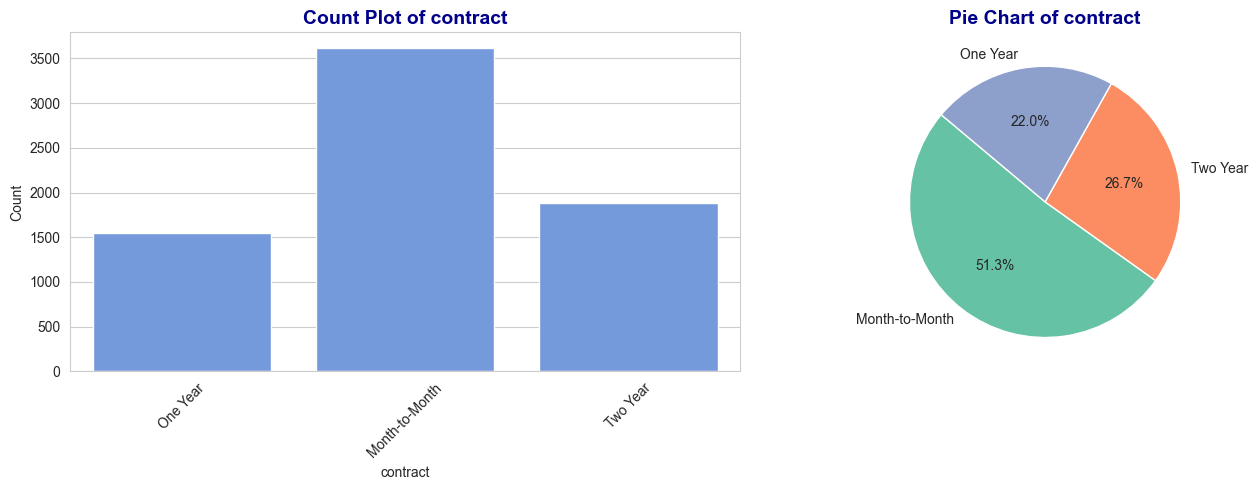

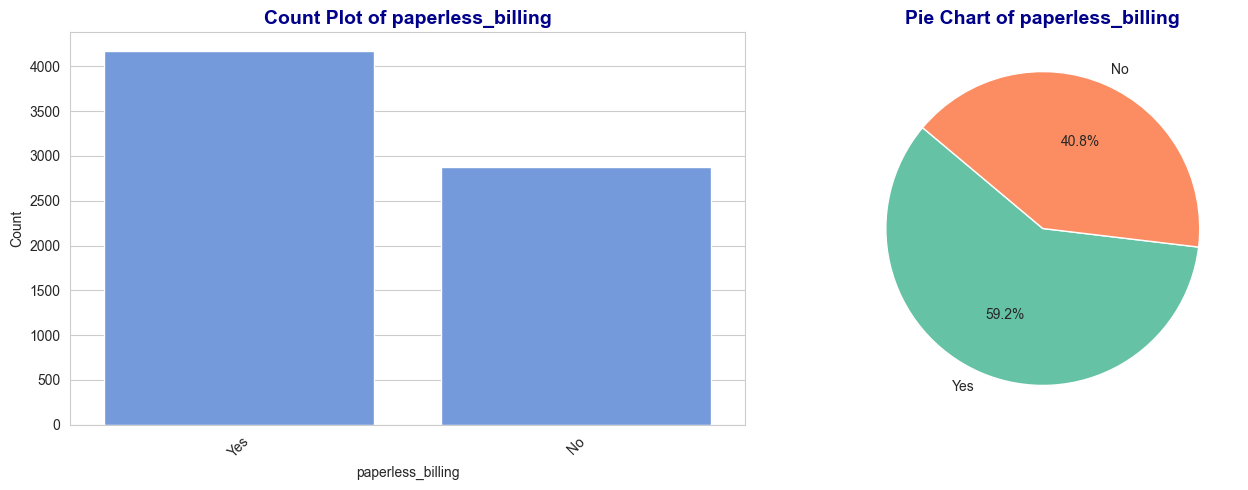

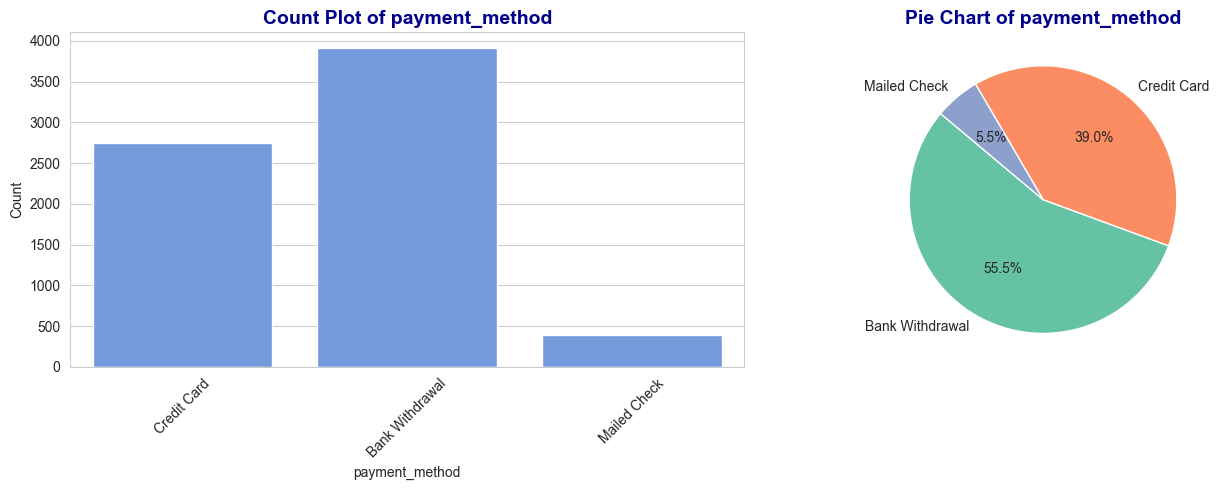

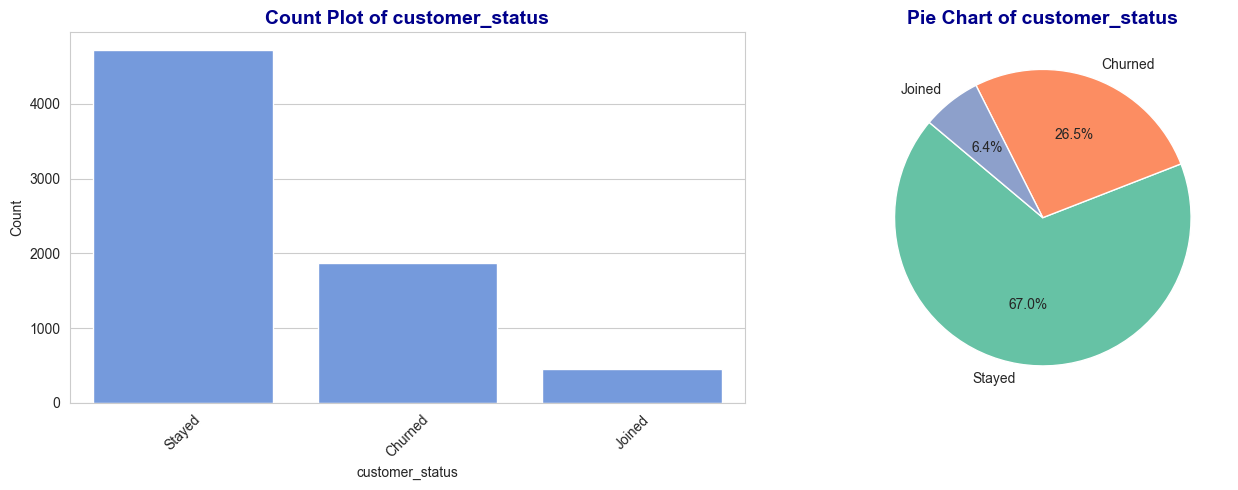

In [58]:
sns.set_style("whitegrid")
sns.set_palette("Set2")


for col in cat_cols:

    fig, ax = plt.subplots(1, 2, figsize=(14, 5))

    sns.countplot(data=df, x=col, color='cornflowerblue', ax = ax[0])
    ax[0].set_title(f'Count Plot of {col}', fontsize=14, fontweight='bold', color='darkblue')
    ax[0].set_xlabel(col)
    ax[0].set_ylabel('Count')
    ax[0].tick_params(axis='x', rotation=45)


    pie_data = df[col].value_counts()
    ax[1].pie(pie_data, labels = pie_data.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
    ax[1].set_title(f'Pie Chart of {col}', fontsize=14, fontweight='bold', color='darkblue')


    plt.tight_layout()
    plt.show()

#### **Bivariate Analysis**

<Axes: xlabel='age', ylabel='Count'>

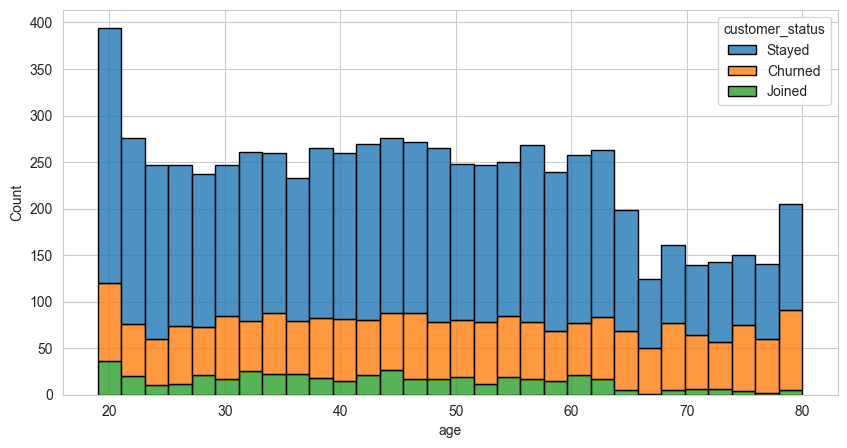

In [59]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 5))

custom_palette = {
    'Stayed': '#1f77b4',    # Blue
    'Churned': '#ff7f0e',   # Orange
    'Joined': '#2ca02c'     # Green
}

sns.histplot(data = df, x = 'age', hue = 'customer_status', multiple='stack', palette = custom_palette, bins=30, edgecolor='black', alpha=0.8)

<Axes: xlabel='gender', ylabel='count'>

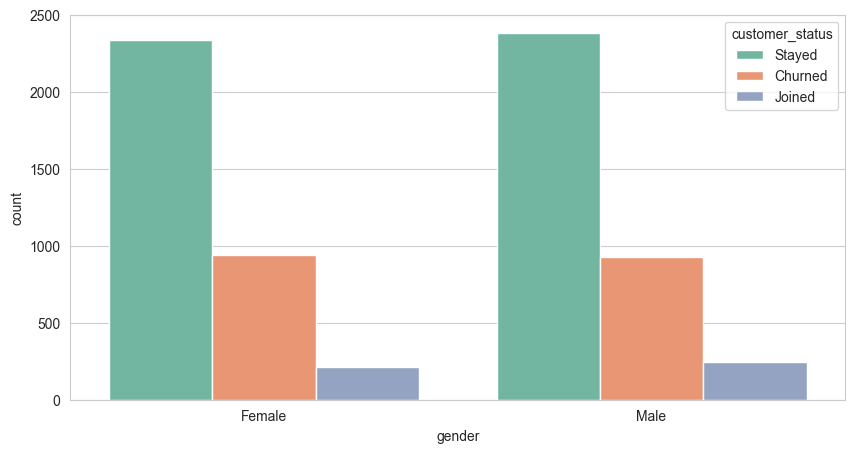

In [60]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 5))

sns.countplot(data = df, x = 'gender', hue = 'customer_status')

<Axes: xlabel='married', ylabel='count'>

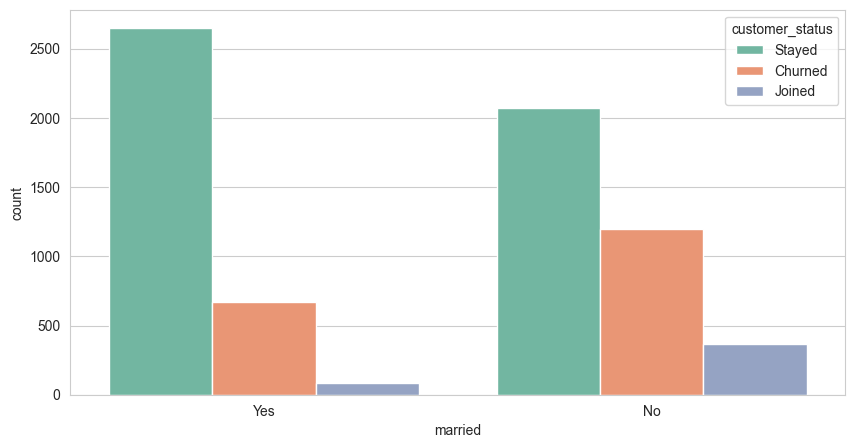

In [61]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 5))

sns.countplot(data = df, x = 'married', hue = 'customer_status')

<Axes: xlabel='number_of_dependents', ylabel='Count'>

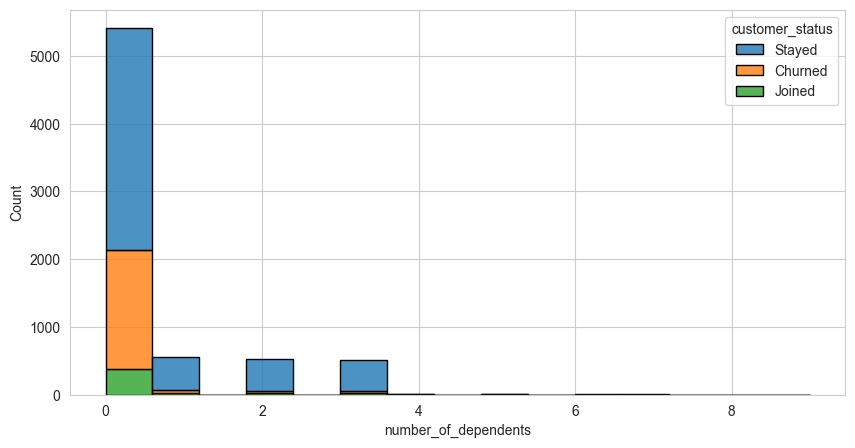

In [62]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 5))

custom_palette = {
    'Stayed': '#1f77b4',    # Blue
    'Churned': '#ff7f0e',   # Orange
    'Joined': '#2ca02c'     # Green
}

sns.histplot(data = df, x = 'number_of_dependents', hue = 'customer_status', multiple='stack', palette = custom_palette, bins=15, edgecolor='black', alpha=0.8)

In [63]:
df.sample(6)

,customer_id,gender,age,married,number_of_dependents,city,zip_code,latitude,longitude,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status,has_offer,offer_popularity
3980,5606-AMZBO,Female,23,Yes,0,Rosamond,93560,34.903052,-118.411251,4,10,No Offer,Yes,38,Yes,Yes,Fiber Optic,42.0,Yes,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,78.15,765.15,0.0,0,380.30,1145.45,Stayed,0,0.550476
2910,4140-MUHUG,Female,73,No,0,Oak View,93022,34.404544,-119.302118,0,3,No Offer,Yes,18,No,Yes,Fiber Optic,20.0,No,No,Yes,No,Yes,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,86.85,220.95,0.0,0,55.14,276.09,Churned,0,0.550476
1181,1734-ZMNTZ,Female,50,Yes,2,Eureka,95501,40.796621,-124.154280,1,11,No Offer,Yes,15,Yes,No,No Internet,0.0,No,No,No,No,No,No,No,No,Two Year,No,Credit Card,25.00,300.70,0.0,0,165.44,466.14,Stayed,0,0.550476
3447,4884-TVUQF,Female,80,No,0,Occidental,95465,38.415003,-122.998726,0,57,Offer B,Yes,36,Yes,Yes,Fiber Optic,17.0,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Two Year,No,Credit Card,101.30,5779.60,0.0,0,2102.73,7882.33,Stayed,1,0.116996
6428,9102-IAYHT,Female,29,Yes,0,Salinas,93908,36.624338,-121.615669,1,17,No Offer,Yes,47,Yes,Yes,Fiber Optic,26.0,No,No,No,No,No,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,85.45,1451.60,0.0,0,811.92,2263.52,Churned,0,0.550476
4018,5666-CYCYZ,Female,21,No,0,Montebello,90640,34.015217,-118.109962,0,24,No Offer,Yes,18,Yes,Yes,Fiber Optic,52.0,No,No,No,Yes,No,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,89.55,2259.35,0.0,0,433.68,2693.03,Stayed,0,0.550476


In [64]:
top_10_cities = df['city'].value_counts().sort_values(ascending = False).head(10).index

<Axes: xlabel='city', ylabel='count'>

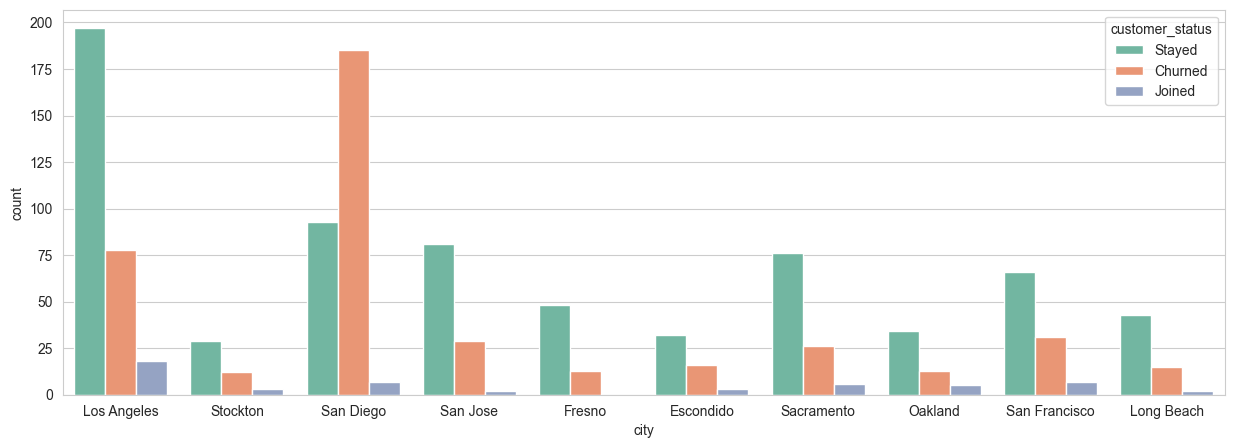

In [65]:
sns.set_style("whitegrid")

plt.figure(figsize=(15, 5))

top_10_df_cities = df[df['city'].isin(top_10_cities)]

sns.countplot(data = top_10_df_cities, x = 'city', hue = 'customer_status')

In [66]:
churned_df = df[df['customer_status'] == 'Churned']

top_10_cities = churned_df['city'].value_counts().sort_values(ascending = False).head(10).index

Text(0.5, 1.0, 'Which city has maximum churn')

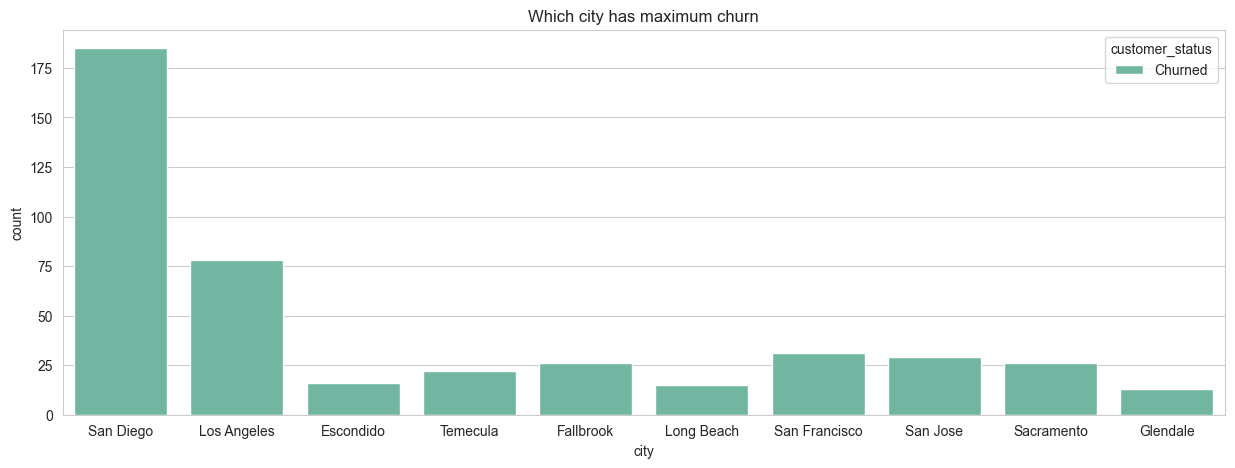

In [67]:
sns.set_style("whitegrid")

plt.figure(figsize=(15, 5))

top_10_df_cities = churned_df[churned_df['city'].isin(top_10_cities)]

sns.countplot(data = top_10_df_cities, x = 'city', hue = 'customer_status')
plt.title("Which city has maximum churn")

In [68]:
churned_df = df[df['customer_status'] == 'Churned']

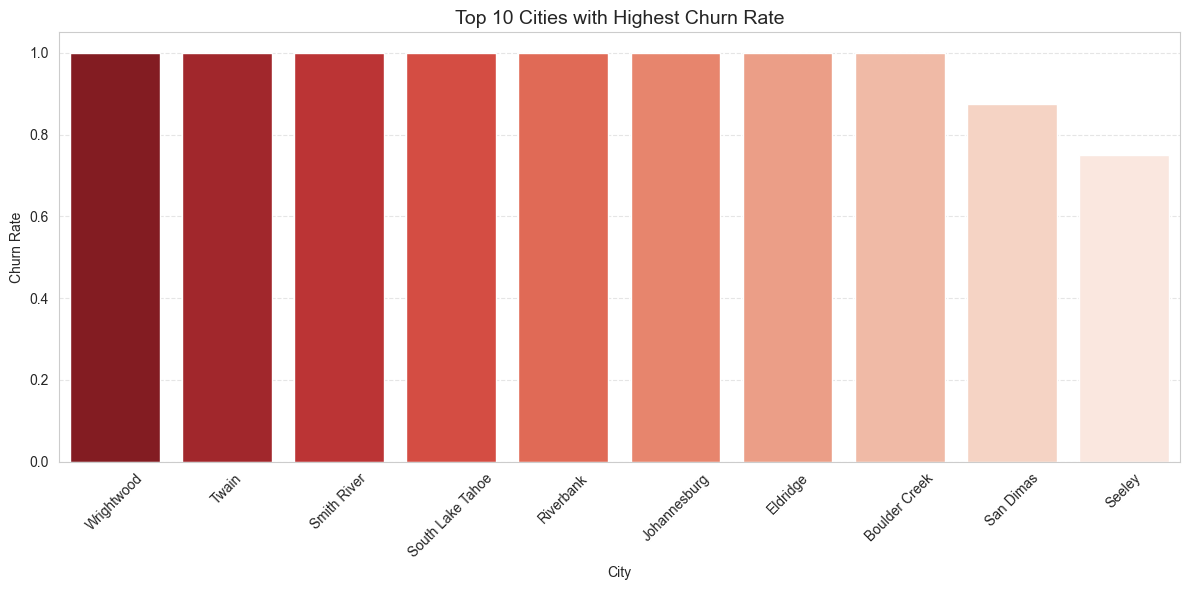

In [69]:
total_per_city = df.groupby('city').size()

churned_per_city = churned_df.groupby('city').size()

churn_rate = (churned_per_city / total_per_city).sort_values(ascending=False)

top_10_churn_rate = churn_rate.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_churn_rate.index, y=top_10_churn_rate.values, palette='Reds_r')
plt.title('Top 10 Cities with Highest Churn Rate', fontsize=14)
plt.xlabel('City')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [70]:
df.sample(6)

,customer_id,gender,age,married,number_of_dependents,city,zip_code,latitude,longitude,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status,has_offer,offer_popularity
118,0206-TBWLC,Female,63,Yes,0,Calimesa,92320,33.982787,-117.057627,7,54,Offer B,Yes,11,Yes,Yes,Fiber Optic,26.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,One Year,Yes,Credit Card,114.65,6049.50,0.0,0,615.60,6665.10,Stayed,1,0.116996
4054,5709-LVOEQ,Female,40,Yes,0,San Mateo,94401,37.590421,-122.306467,8,10,No Offer,Yes,31,No,Yes,DSL,5.0,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Two Year,No,Mailed Check,80.85,808.50,0.0,0,310.90,1119.40,Stayed,0,0.550476
1648,2393-DIVAI,Female,40,No,0,Brea,92821,33.930199,-117.862898,0,3,Offer E,Yes,15,No,No,No Internet,0.0,No,No,No,No,No,No,No,No,Month-to-Month,Yes,Credit Card,20.00,61.70,0.0,0,46.11,107.81,Joined,1,0.114298
4489,6338-AVWCY,Male,19,No,0,Escondido,92027,33.141265,-116.967221,0,3,No Offer,No,0,No,Yes,DSL,26.0,No,No,Yes,No,Yes,No,No,Yes,Month-to-Month,Yes,Mailed Check,40.15,130.75,0.0,0,0.00,130.75,Churned,0,0.550476
4060,5724-BIDBU,Male,29,Yes,0,Penn Valley,95946,39.203817,-121.195840,3,49,No Offer,Yes,42,Yes,Yes,Cable,52.0,Yes,No,No,No,No,No,No,Yes,One Year,Yes,Bank Withdrawal,55.35,2633.95,0.0,0,2067.31,4701.26,Stayed,0,0.550476
3261,4661-NJEUX,Male,42,No,0,Portola Valley,94028,37.369709,-122.215844,0,1,No Offer,Yes,3,No,No,No Internet,0.0,No,No,No,No,No,No,No,No,Month-to-Month,Yes,Credit Card,20.05,20.05,0.0,0,3.23,23.28,Joined,0,0.550476


In [71]:
df['number_of_referrals'].value_counts()

number_of_referrals
0     3821
1     1086
5      264
3      255
7      248
9      238
2      236
4      236
10     223
6      221
8      213
11       2
Name: count, dtype: int64

In [72]:
churn_based_refral_rate = pd.crosstab(df['number_of_referrals'],df['customer_status'])

In [73]:
churn_based_refral_rate['Total'] = churn_based_refral_rate['Churned'] + churn_based_refral_rate['Joined'] + churn_based_refral_rate['Stayed']

In [74]:
churn_based_refral_rate['churn_rate']  = churn_based_refral_rate['Churned'] / churn_based_refral_rate['Total']

In [75]:
churn_based_refral_rate

customer_status,Churned,Joined,Stayed,Total,churn_rate
number_of_referrals,,,,,
0,1245,373,2203,3821,0.325831
1,507,15,564,1086,0.466851
2,26,7,203,236,0.110169
3,32,8,215,255,0.125490
4,18,3,215,236,0.076271
5,21,9,234,264,0.079545
6,8,7,206,221,0.036199
7,6,5,237,248,0.024194
8,2,7,204,213,0.009390


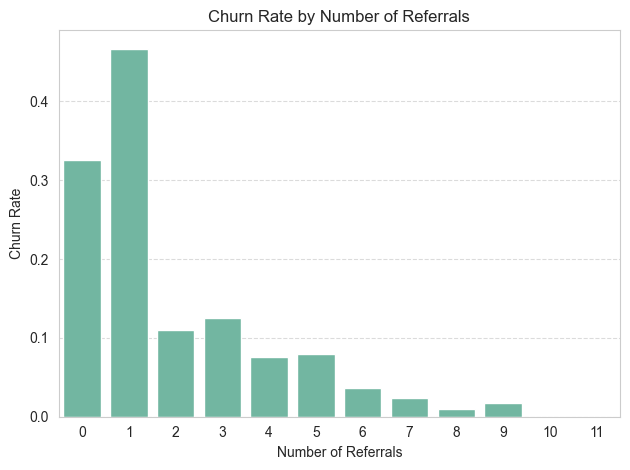

In [76]:
sns.barplot(churn_based_refral_rate['churn_rate'])

plt.title('Churn Rate by Number of Referrals')
plt.ylabel("Churn Rate")
plt.xlabel("Number of Referrals")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [77]:
df['tenure_in_months'].unique()

array([ 9,  4, 13,  3, 71, 63,  7, 65, 54, 72,  5, 56, 34,  1, 45, 50, 23,
       55, 26, 69, 37, 49, 66, 67, 20, 43, 59, 12, 27,  2, 25, 29, 14, 35,
       64, 39, 40, 11,  6, 30, 70, 57, 58, 16, 32, 33, 10, 21, 61, 15, 44,
       22, 24, 19, 47, 62, 46, 52,  8, 60, 48, 28, 41, 53, 68, 31, 36, 17,
       18, 51, 38, 42])

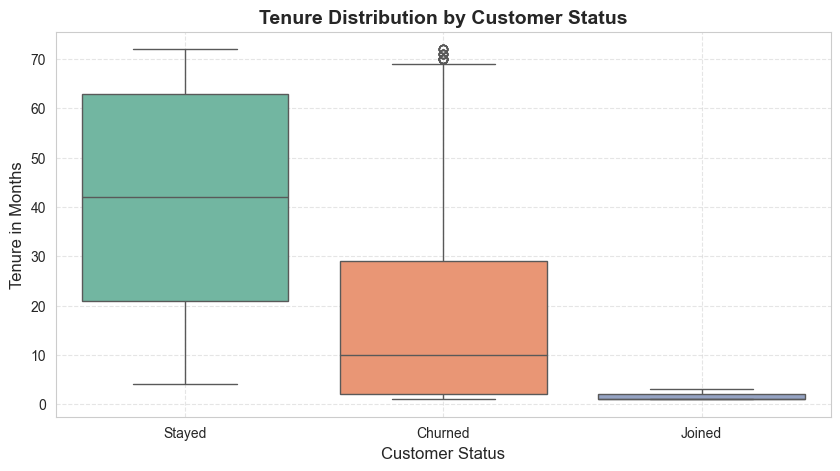

In [78]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='customer_status', y='tenure_in_months', palette='Set2')
plt.title("Tenure Distribution by Customer Status", fontsize=14, fontweight='bold')
plt.xlabel("Customer Status", fontsize=12)
plt.ylabel("Tenure in Months", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

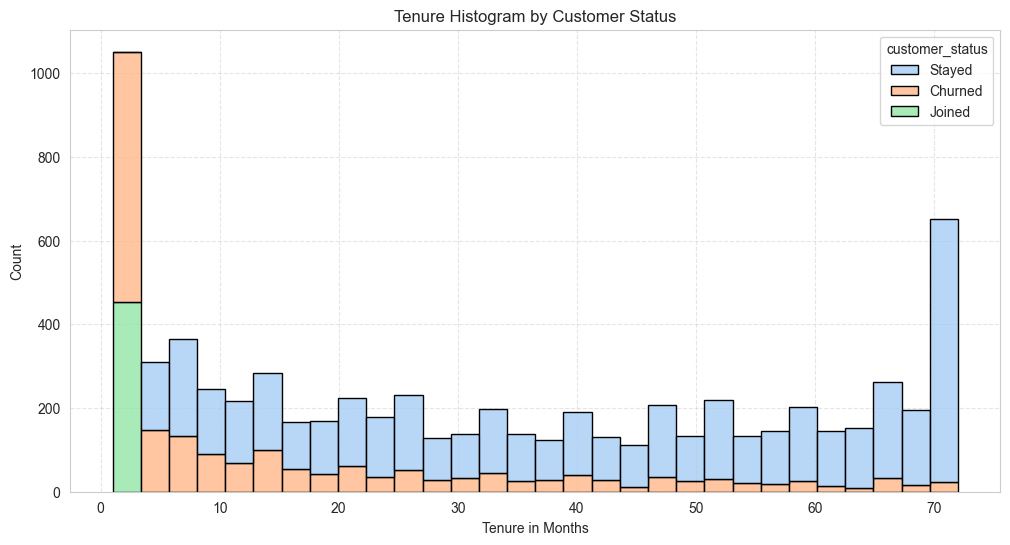

In [79]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='tenure_in_months', hue='customer_status', multiple='stack', bins=30, palette='pastel', edgecolor='black')
plt.title("Tenure Histogram by Customer Status")
plt.xlabel("Tenure in Months")
plt.ylabel("Count")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [80]:
pd.crosstab(df['has_offer'], df['customer_status'])

customer_status,Churned,Joined,Stayed
has_offer,,,
0,1051,279,2547
1,818,175,2173


<Axes: xlabel='has_offer', ylabel='count'>

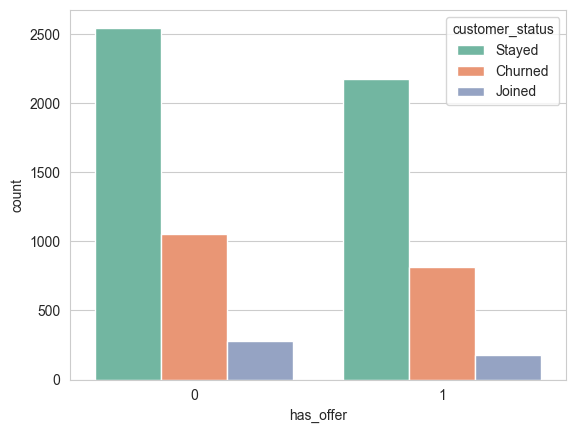

In [81]:
sns.countplot(data = df, x = 'has_offer', hue = 'customer_status')

<Axes: xlabel='avg_monthly_long_distance_charges'>

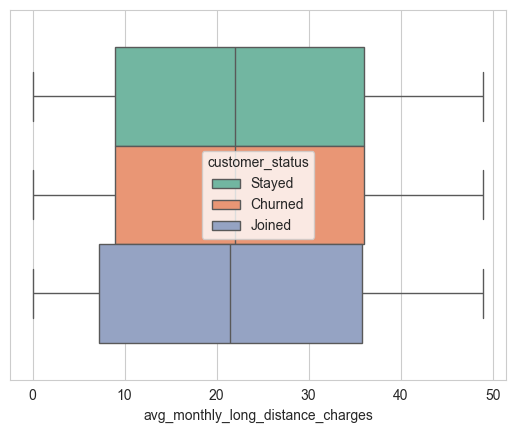

In [82]:
sns.boxplot(data = df, x = 'avg_monthly_long_distance_charges', hue = 'customer_status')

In [83]:
pd.crosstab(df['internet_service'], df['customer_status'])

customer_status,Churned,Joined,Stayed
internet_service,,,
No,113,182,1231
Yes,1756,272,3489


<Axes: xlabel='internet_service', ylabel='count'>

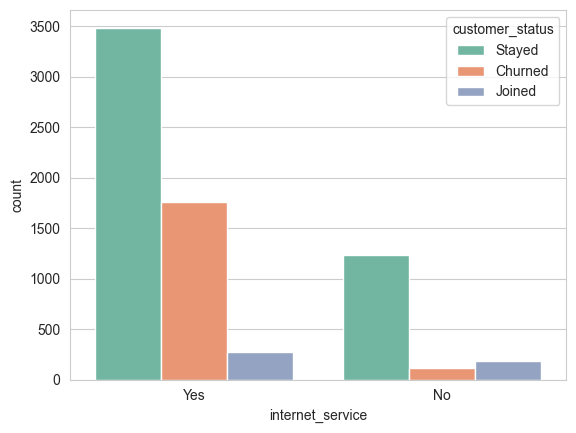

In [84]:
sns.countplot(data = df, x = 'internet_service', hue = 'customer_status')

In [85]:
pd.crosstab(df['internet_type'], df['customer_status'])

customer_status,Churned,Joined,Stayed
internet_type,,,
Cable,213,56,561
DSL,307,115,1230
Fiber Optic,1236,101,1698
No Internet,113,182,1231


<Axes: xlabel='internet_type', ylabel='count'>

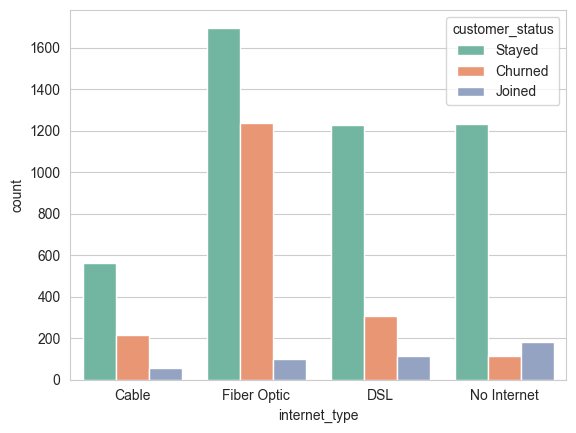

In [86]:
sns.countplot(data = df, x = 'internet_type', hue = 'customer_status')

In [87]:
sample_df = df[(df['internet_service'] == 'Yes') & (df['unlimited_data'] == 'Yes')]

<Axes: xlabel='avg_monthly_gb_download', ylabel='customer_status'>

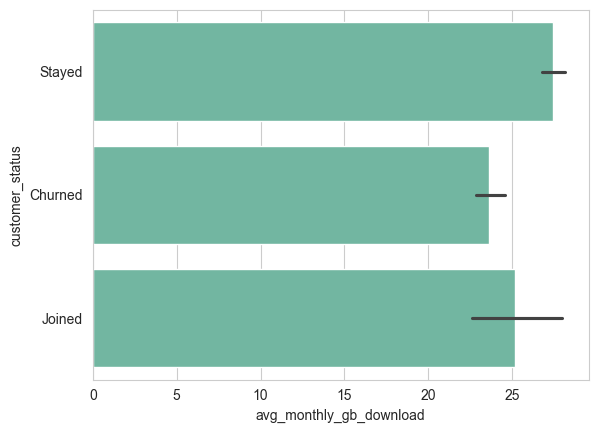

In [88]:
sns.barplot(data = sample_df, x = 'avg_monthly_gb_download', y = 'customer_status')

<Axes: xlabel='contract', ylabel='count'>

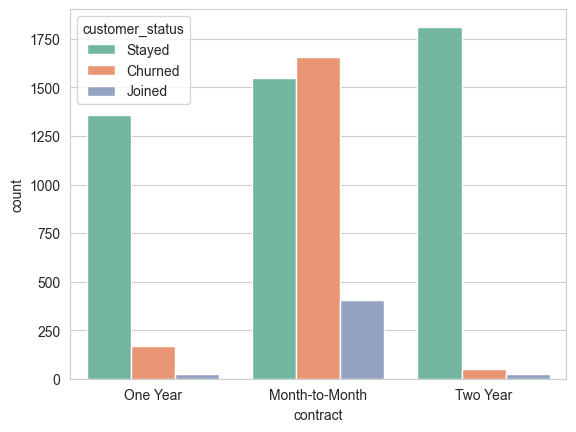

In [89]:
sns.countplot(data = df, x = 'contract', hue = 'customer_status')

<Axes: xlabel='payment_method', ylabel='count'>

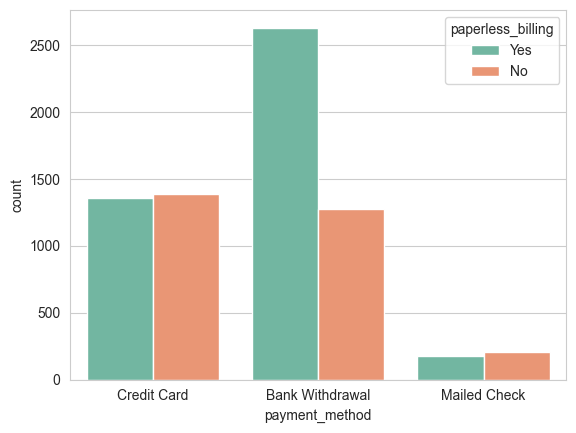

In [90]:
sns.countplot(data = df, x = 'payment_method', hue = 'paperless_billing')

<Axes: xlabel='payment_method', ylabel='count'>

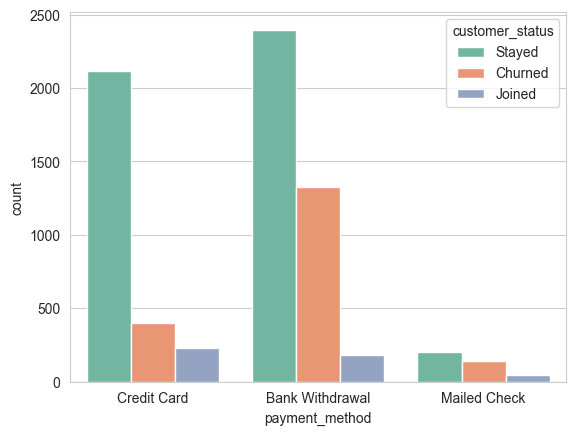

In [91]:
sns.countplot(data = df, x = 'payment_method', hue = 'customer_status')

In [92]:
df.sample(6)

,customer_id,gender,age,married,number_of_dependents,city,zip_code,latitude,longitude,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status,has_offer,offer_popularity
2549,3645-DEYGF,Male,29,No,1,Northridge,91325,34.236683,-118.517588,0,1,No Offer,Yes,7,No,No,No Internet,0.0,No,No,No,No,No,No,No,No,Month-to-Month,No,Credit Card,20.75,20.75,0.00,0,7.57,28.32,Joined,0,0.550476
3047,4361-FEBGN,Male,41,No,0,San Francisco,94131,37.746699,-122.442833,0,48,No Offer,Yes,33,No,No,No Internet,0.0,No,No,No,No,No,No,No,No,Two Year,No,Credit Card,20.15,982.95,0.00,0,1616.64,2599.59,Stayed,0,0.550476
907,1320-REHCS,Male,75,No,0,Inglewood,90301,33.956445,-118.358634,0,52,No Offer,Yes,23,Yes,Yes,Fiber Optic,25.0,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Two Year,Yes,Bank Withdrawal,110.75,5832.00,6.26,0,1198.08,7023.82,Stayed,0,0.550476
3445,4883-QICIH,Male,37,Yes,0,Bodega Bay,94923,38.377165,-123.037957,1,32,No Offer,Yes,5,No,Yes,Fiber Optic,5.0,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,69.75,2347.90,19.67,0,191.68,2519.91,Churned,0,0.550476
3715,5227-JSCFE,Male,74,Yes,0,Scotts Valley,95066,37.070177,-122.010077,9,71,Offer A,No,0,No,Yes,DSL,19.0,Yes,Yes,Yes,Yes,No,No,No,Yes,Two Year,No,Credit Card,46.35,3353.40,18.64,0,0.00,3334.76,Stayed,1,0.073832
5012,7044-YAACC,Male,70,Yes,0,Napa,94559,38.232389,-122.324944,5,4,No Offer,Yes,6,No,Yes,Fiber Optic,8.0,No,No,No,No,No,No,No,Yes,Two Year,Yes,Bank Withdrawal,70.20,280.35,30.75,0,24.12,273.72,Stayed,0,0.550476


In [93]:
df['has_extra_internet_charges'] = df['total_extra_data_charges'].apply(lambda x: 1 if x > 0 else 0)

<Axes: xlabel='has_extra_internet_charges', ylabel='count'>

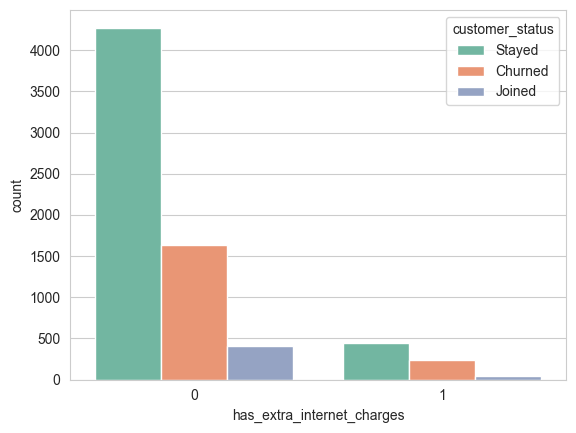

In [94]:
sns.countplot(data = df, x = 'has_extra_internet_charges', hue = 'customer_status')

<Axes: ylabel='offer_popularity'>

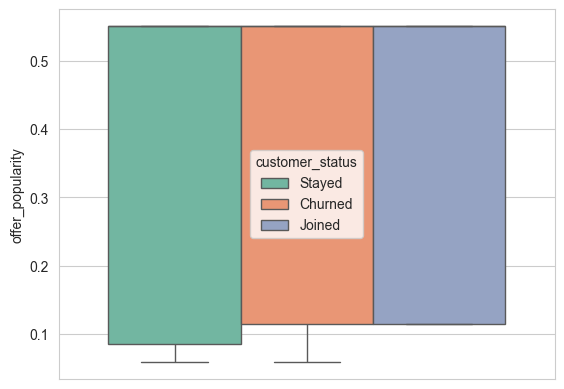

In [95]:
sns.boxplot(data = df, y = 'offer_popularity', hue = 'customer_status')

<Axes: xlabel='has_offer', ylabel='count'>

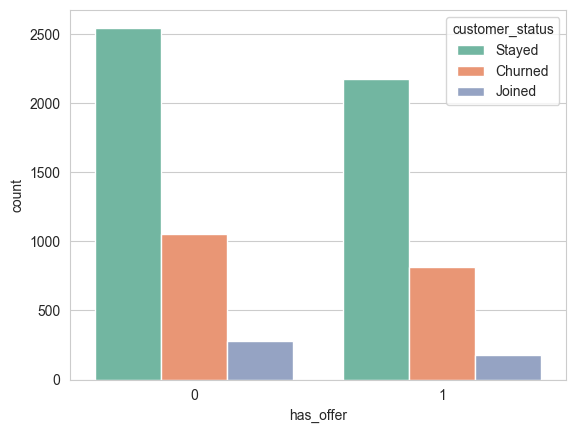

In [96]:
sns.countplot(data = df, x = 'has_offer', hue = 'customer_status')

In [97]:
df.sample(6)

,customer_id,gender,age,married,number_of_dependents,city,zip_code,latitude,longitude,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status,has_offer,offer_popularity,has_extra_internet_charges
1817,2654-VBVPB,Female,22,No,0,Newport Beach,92663,33.622510,-117.927024,0,1,No Offer,Yes,11,No,No,No Internet,0.0,No,No,No,No,No,No,No,No,Month-to-Month,No,Bank Withdrawal,19.90,19.90,0.00,0,11.83,31.73,Joined,0,0.550476,0
3397,4824-GUCBY,Female,77,No,0,San Francisco,94127,37.736535,-122.457320,0,22,No Offer,Yes,23,No,Yes,Fiber Optic,22.0,Yes,Yes,No,No,No,No,No,Yes,One Year,No,Bank Withdrawal,81.70,1820.90,29.88,0,515.46,2306.48,Stayed,0,0.550476,0
4796,6738-ISCBM,Male,55,No,0,Northridge,91324,34.238208,-118.550290,0,44,No Offer,No,0,No,Yes,Cable,17.0,Yes,No,Yes,No,Yes,Yes,Yes,Yes,One Year,Yes,Bank Withdrawal,54.00,2440.25,5.47,0,0.00,2434.78,Stayed,0,0.550476,0
5623,7924-GJZFI,Female,75,Yes,0,Jackson,95642,38.336216,-120.769010,7,25,No Offer,Yes,38,No,Yes,Fiber Optic,24.0,No,No,No,No,No,No,No,Yes,Two Year,Yes,Bank Withdrawal,69.30,1813.10,0.00,0,964.75,2777.85,Stayed,0,0.550476,0
299,0440-MOGPM,Female,51,No,0,Petaluma,94954,38.235021,-122.557332,0,41,No Offer,Yes,6,Yes,Yes,DSL,12.0,No,Yes,Yes,No,Yes,Yes,Yes,Yes,One Year,Yes,Bank Withdrawal,80.55,3263.90,0.00,0,252.56,3516.46,Stayed,0,0.550476,0
1017,1469-LBJQJ,Female,39,Yes,0,Victorville,92392,34.486835,-117.362274,6,66,Offer A,Yes,42,Yes,Yes,Fiber Optic,30.0,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,105.20,6936.85,0.00,0,2787.18,9724.03,Stayed,1,0.073832,0


In [108]:
df['churned'] = df['customer_status'] == 'Churned'

fig = px.box(df, x='engagement_score', y='total_revenue', color='churned', title="Revenue vs Engagement by Churn")
fig.show()

In [110]:
fig = px.scatter_geo(df[df['customer_status'] == 'Churned'],
                     lat='latitude',
                     lon='longitude',
                     scope='usa',
                     color='total_revenue',
                     hover_name='city',
                     title='Churned Customers Distribution')

fig.show()

In [112]:
fig = px.scatter(df, x='num_addon_services', y='monthly_charge',
                 color='customer_status',
                 size='total_revenue',
                 title='Monthly Charges by Add-on Services and Status')

fig.show()


In [114]:
fig = px.histogram(df, x='contract', color='customer_status',
                   barmode='group', title='Churn Count by Contract Type')

fig.show()

In [117]:
df.to_csv('processed_customer_churn_data.csv', index=False)